In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#url='http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data'
cen=pd.read_csv('census.csv',names=('age','workclass','fnlwgt','edu','edu_num','status','occu','relationship','race','sex','cap_gain','cap_loss',
                           'hr_per_wk','country','income'),na_values=' ?')
cen

,age,workclass,fnlwgt,edu,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
cen.shape

(32561, 15)

In [4]:
cen.dtypes

age              int64
workclass       object
fnlwgt           int64
edu             object
edu_num          int64
status          object
occu            object
relationship    object
race            object
sex             object
cap_gain         int64
cap_loss         int64
hr_per_wk        int64
country         object
income          object
dtype: object

In [5]:
cen.head()

,age,workclass,fnlwgt,edu,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
cen.tail()

,age,workclass,fnlwgt,edu,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
cen.isnull().sum()

age                0
workclass       1836
fnlwgt             0
edu                0
edu_num            0
status             0
occu            1843
relationship       0
race               0
sex                0
cap_gain           0
cap_loss           0
hr_per_wk          0
country          583
income             0
dtype: int64

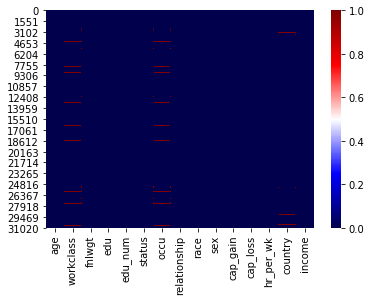

In [8]:
sns.heatmap(cen.isnull(),cmap='seismic')

In [9]:
#workclass,occu and country represents categorical values so replacing NaN values of these column by their mode
print("workclass mode:",cen['workclass'].mode(),'\noccu mode: ',cen['occu'].mode(),'\ncountry mode:',cen['country'].mode())

workclass mode: 0     Private
dtype: object 
occu mode:  0     Prof-specialty
dtype: object 
country mode: 0     United-States
dtype: object


Replacing the NaN values

In [10]:
cen['workclass'].replace(np.NaN,'Private',inplace=True)
cen['occu'].replace(np.NaN,'Prof-specialty',inplace=True)
cen['country'].replace(np.NaN,'United-States',inplace=True)

In [11]:
cen.isnull().sum()

age             0
workclass       0
fnlwgt          0
edu             0
edu_num         0
status          0
occu            0
relationship    0
race            0
sex             0
cap_gain        0
cap_loss        0
hr_per_wk       0
country         0
income          0
dtype: int64

No trace of Null Values

In [12]:
#checking for duplicated values
dups=cen.duplicated(keep='first').sum()
dups

24

In [13]:
#dropping the duplicated values
cen.drop_duplicates(keep='first',inplace=True)

In [14]:
cen.shape

(32537, 15)

All duplicated values have been droped. Earlier the shape was (32561, 15) and now it is (32537, 15)

In [15]:
cen.mean()

age              38.585549
fnlwgt       189780.848511
edu_num          10.081815
cap_gain       1078.443741
cap_loss         87.368227
hr_per_wk        40.440329
dtype: float64

In [16]:
cen.std()

age              13.637984
fnlwgt       105556.471009
edu_num           2.571633
cap_gain       7387.957424
cap_loss        403.101833
hr_per_wk        12.346889
dtype: float64

In [17]:
cen.min()

age                              17
workclass               Federal-gov
fnlwgt                        12285
edu                            10th
edu_num                           1
status                     Divorced
occu                   Adm-clerical
relationship                Husband
race             Amer-Indian-Eskimo
sex                          Female
cap_gain                          0
cap_loss                          0
hr_per_wk                         1
country                    Cambodia
income                        <=50K
dtype: object

In [18]:
cen.max()

age                         90
workclass              Private
fnlwgt                 1484705
edu               Some-college
edu_num                     16
status                 Widowed
occu            Prof-specialty
relationship              Wife
race                     White
sex                       Male
cap_gain                 99999
cap_loss                  4356
hr_per_wk                   99
country          United-States
income                    >50K
dtype: object

In [19]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age             32537 non-null int64
workclass       32537 non-null object
fnlwgt          32537 non-null int64
edu             32537 non-null object
edu_num         32537 non-null int64
status          32537 non-null object
occu            32537 non-null object
relationship    32537 non-null object
race            32537 non-null object
sex             32537 non-null object
cap_gain        32537 non-null int64
cap_loss        32537 non-null int64
hr_per_wk       32537 non-null int64
country         32537 non-null object
income          32537 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [20]:
cen.groupby(['workclass','income']).mean()

age         fnlwgt    edu_num     cap_gain  \
workclass         income                                                     
 Federal-gov       <=50K  40.624788  183854.295416  10.483871   173.207131   
                   >50K   45.711590  187391.412399  11.752022  1881.088949   
 Local-gov         <=50K  40.704607  186743.855691  10.580623   169.179539   
                   >50K   44.254457  193175.021070  12.145867  2581.126418   
 Never-worked      <=50K  20.571429  225989.571429   7.428571     0.000000   
 Private           <=50K  35.117209  193800.880251   9.447550   137.621217   
                   >50K   42.816368  189063.235638  11.429147  3576.726466   
 Self-emp-inc      <=50K  43.206478  167051.633603  10.198381   177.941296   
                   >50K   48.249196  183073.429260  11.882637  8606.705788   
 Self-emp-not-inc  <=50K  44.386013  172742.912445   9.697687   220.916300   
                   >50K   46.428177  182979.212707  11.552486  6065.330110   
 State-gov         <=50K  37.279365  183425.820106  10.800000   137.730159   
                   >50K   45.209632  186039.444759  12.917847  2211.475921   
 Without-pay       <=50K  47.785714  174267.500000   9.071429   487.857143   
Private            <=50K  39.258359  189090.996960   9.023100   159.157447   
                   >50K   55.617801  183567.052356  11.303665  4462.109948   

                            cap_loss  hr_per_wk  
workclass         income                         
 Federal-gov       <=50K   91.278438  40.093379  
                   >50K   145.592992  43.420485  
 Local-gov         <=50K   79.185637  39.739837  
                   >50K   183.220421  43.956240  
 Never-worked      <=50K    0.000000  28.428571  
 Private           <=50K   50.000226  38.806007  
                   >50K   187.517436  45.501512  
 Self-emp-inc      <=50K   54.368421  47.135628  
                   >50K   235.172026  50.154341  
 Self-emp-not-inc  <=50K   62.664097  43.519273  
                   >50K   252.158840  46.691989  
 State-gov         <=50K   40.100529  37.105820  
                   >50K   198.787535  44.186969  
 Without-pay       <=50K    0.000000  32.714286  
Private            <=50K   47.961702  31.428571  
                   >50K   170.989529  36.146597

In [21]:
cen.groupby(['sex','income']).mean()

age         fnlwgt    edu_num     cap_gain    cap_loss  \
sex     income                                                                 
 Female  <=50K  36.217468  185962.778879   9.821872   122.100699   47.408953   
         >50K   42.125530  183687.406277  11.787108  4200.389313  173.648855   
 Male    <=50K  37.148726  193124.868674   9.452928   165.866358   56.855640   
         >50K   44.627177  188764.011411  11.581231  3972.958559  198.840090   

                hr_per_wk  
sex     income             
 Female  <=50K  35.921736  
         >50K   40.426633  
 Male    <=50K  40.694873  
         >50K   46.366817

In [22]:
#checking value counts of categorical values
for i in ('workclass','edu','status','occu','relationship','race','sex','country','income'):
    vcnt=cen[i].value_counts()
    print()
    print('The counts of unique values in --', i,' is:','\n','++'*35,'\n',vcnt,'\n')



The counts of unique values in -- workclass  is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
Private               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 


The counts of unique values in -- edu  is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
  HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: edu, dtype: int64 


The counts of unique values in -- status  is: 
 ++++++++++++++++++++++++++++++++++++++

In [23]:
#mapping income in form of 0 and 1
m={' <=50K':0,' >50K':1}
cen['income']=cen['income'].map(m)

In [24]:
cen['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

So  a total of 7839 numbers of people earn more than 50k while 24698 earn less than 50k

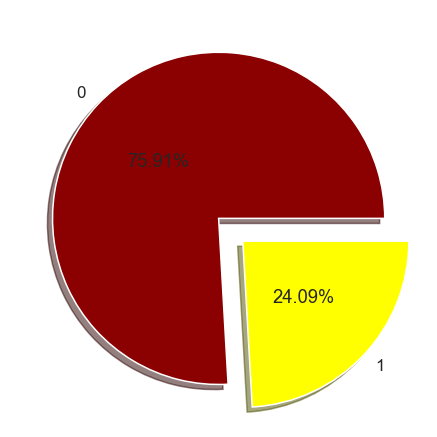

In [25]:
#pie plot to visualize the ratio of peoples' yearly earning 
lbl=cen['income'].value_counts().index.tolist()
per=cen['income'].value_counts().values.tolist()
exp=(0,0.2)
clr=('darkred','yellow')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=1)
plt.show()

In [26]:
pd.crosstab(cen['edu'],cen['edu_num'])

edu_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
edu,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,166,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,332,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [27]:
pd.crosstab(cen['edu'],cen['income'])

income,0,1
edu,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,160,6
5th-6th,316,16
7th-8th,605,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [28]:
cen.describe()

,age,fnlwgt,edu_num,cap_gain,cap_loss,hr_per_wk,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [29]:
o=['object']
cen.describe(include=o)

,workclass,edu,status,occu,relationship,race,sex,country
count,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22673,10494,14970,4136,13187,27795,21775,29153


In [30]:
#using graphical methods for more exploration of data

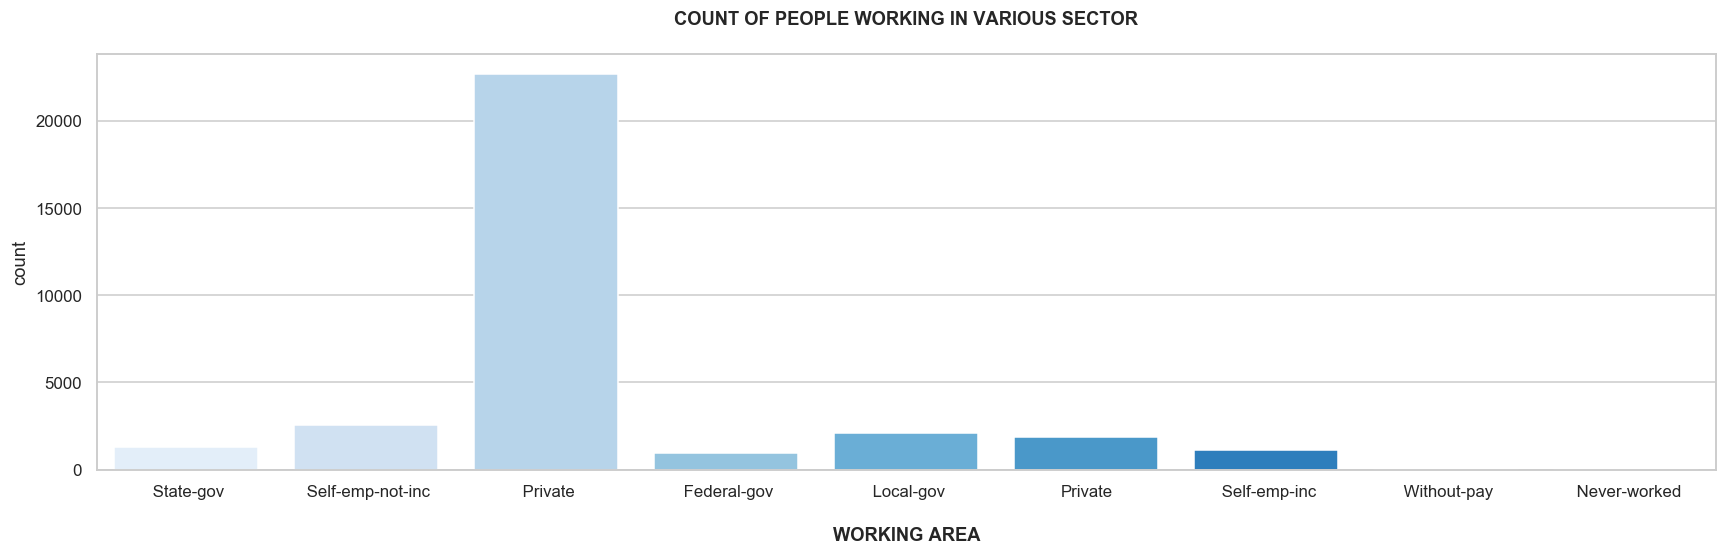

In [31]:
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='workclass',data=cen,orient='v',palette='Blues',saturation=18)
plt.xlabel('\nWORKING AREA',weight='bold')
plt.title('COUNT OF PEOPLE WORKING IN VARIOUS SECTOR\n',weight='bold')
plt.show()

               THE NUMBER OF PEOPLE WORKING IN PRIVATE FIRM IS HIGH AS COMPARED TO OTHER SECTORS

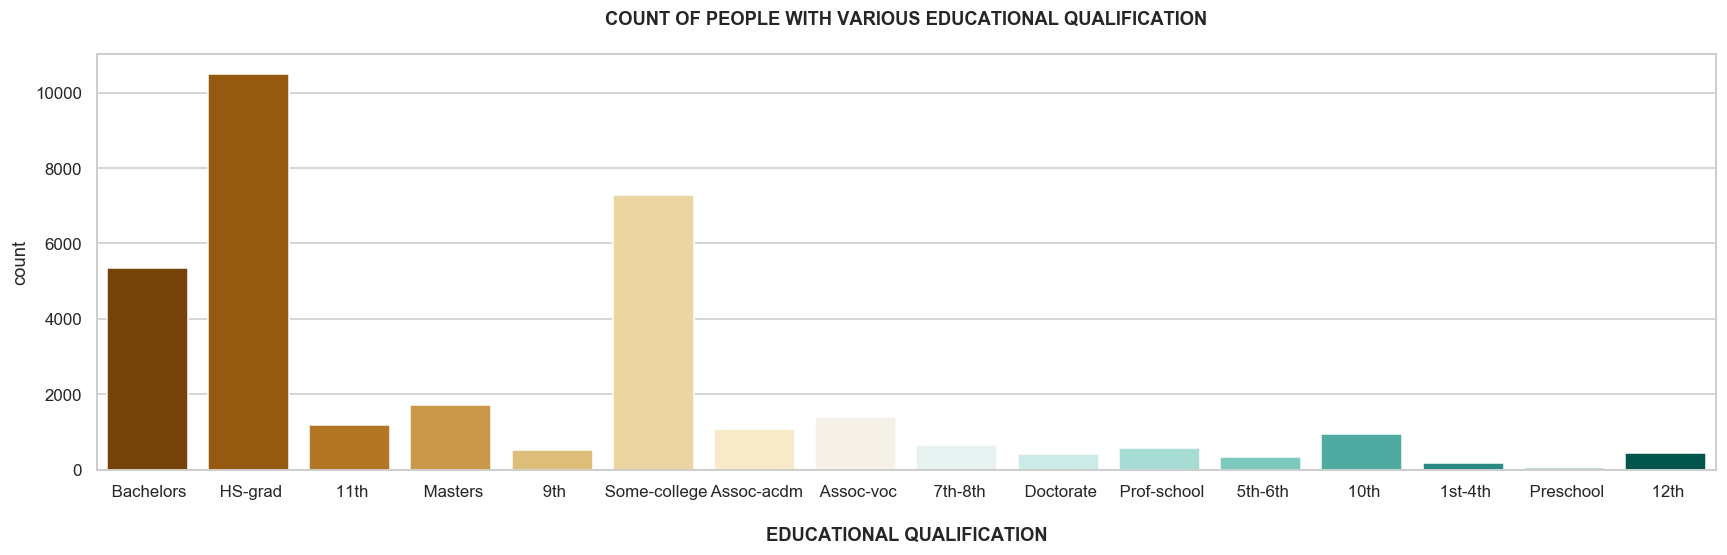

In [32]:
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='edu',data=cen,orient='v',palette='BrBG',saturation=18)
plt.xlabel('\nEDUCATIONAL QUALIFICATION',weight='bold')
plt.title('COUNT OF PEOPLE WITH VARIOUS EDUCATIONAL QUALIFICATION\n',weight='bold')
plt.show()

       THE COUNT OF PEOPLE WORKING WITH A QUALIFICATION OF HS_GRAD IS HIGH AS COMPARED TO OTHER QUALIFICATION

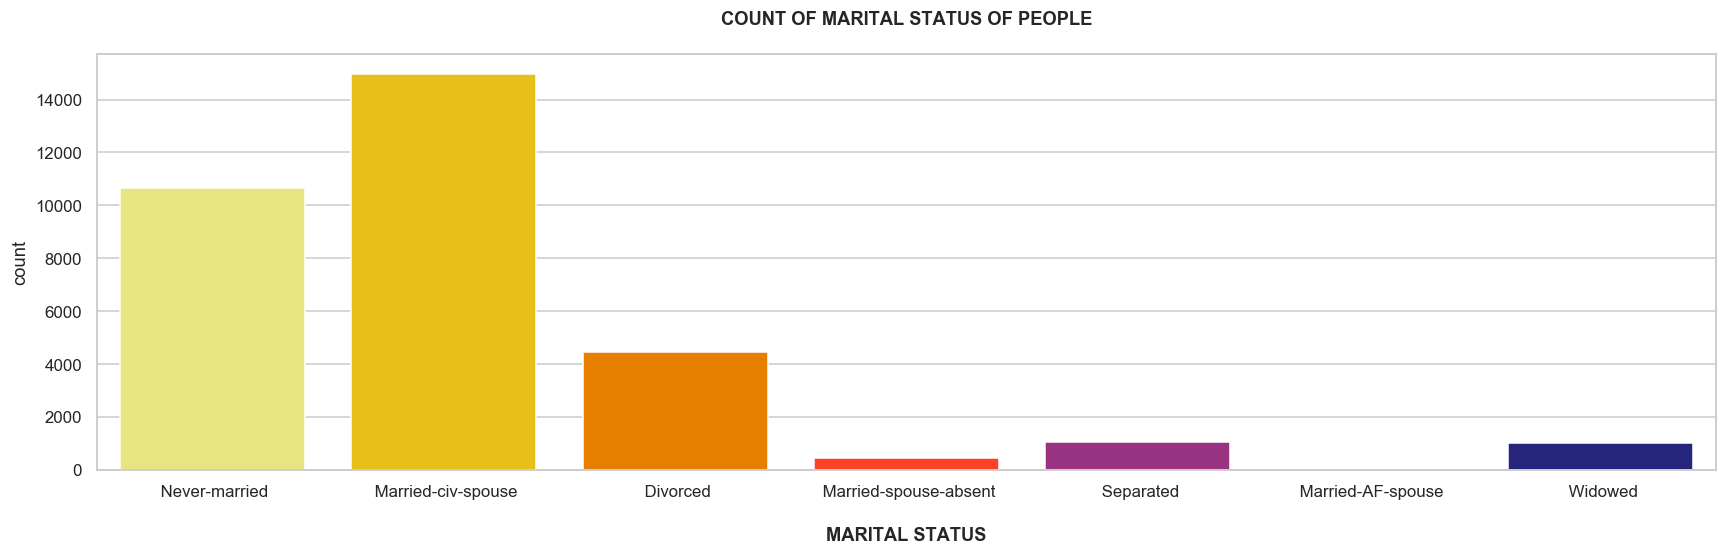

In [33]:
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='status',data=cen,orient='v',palette='CMRmap_r',saturation=18)
plt.xlabel('\nMARITAL STATUS',weight='bold')
plt.title('COUNT OF MARITAL STATUS OF PEOPLE\n',weight='bold')
plt.show()

            THE COUNT OF MARRIED WORKING PEOPLE ARE HIGH AND COUNT OF UNMARRIED PEOPLE COMES AFTER THAT

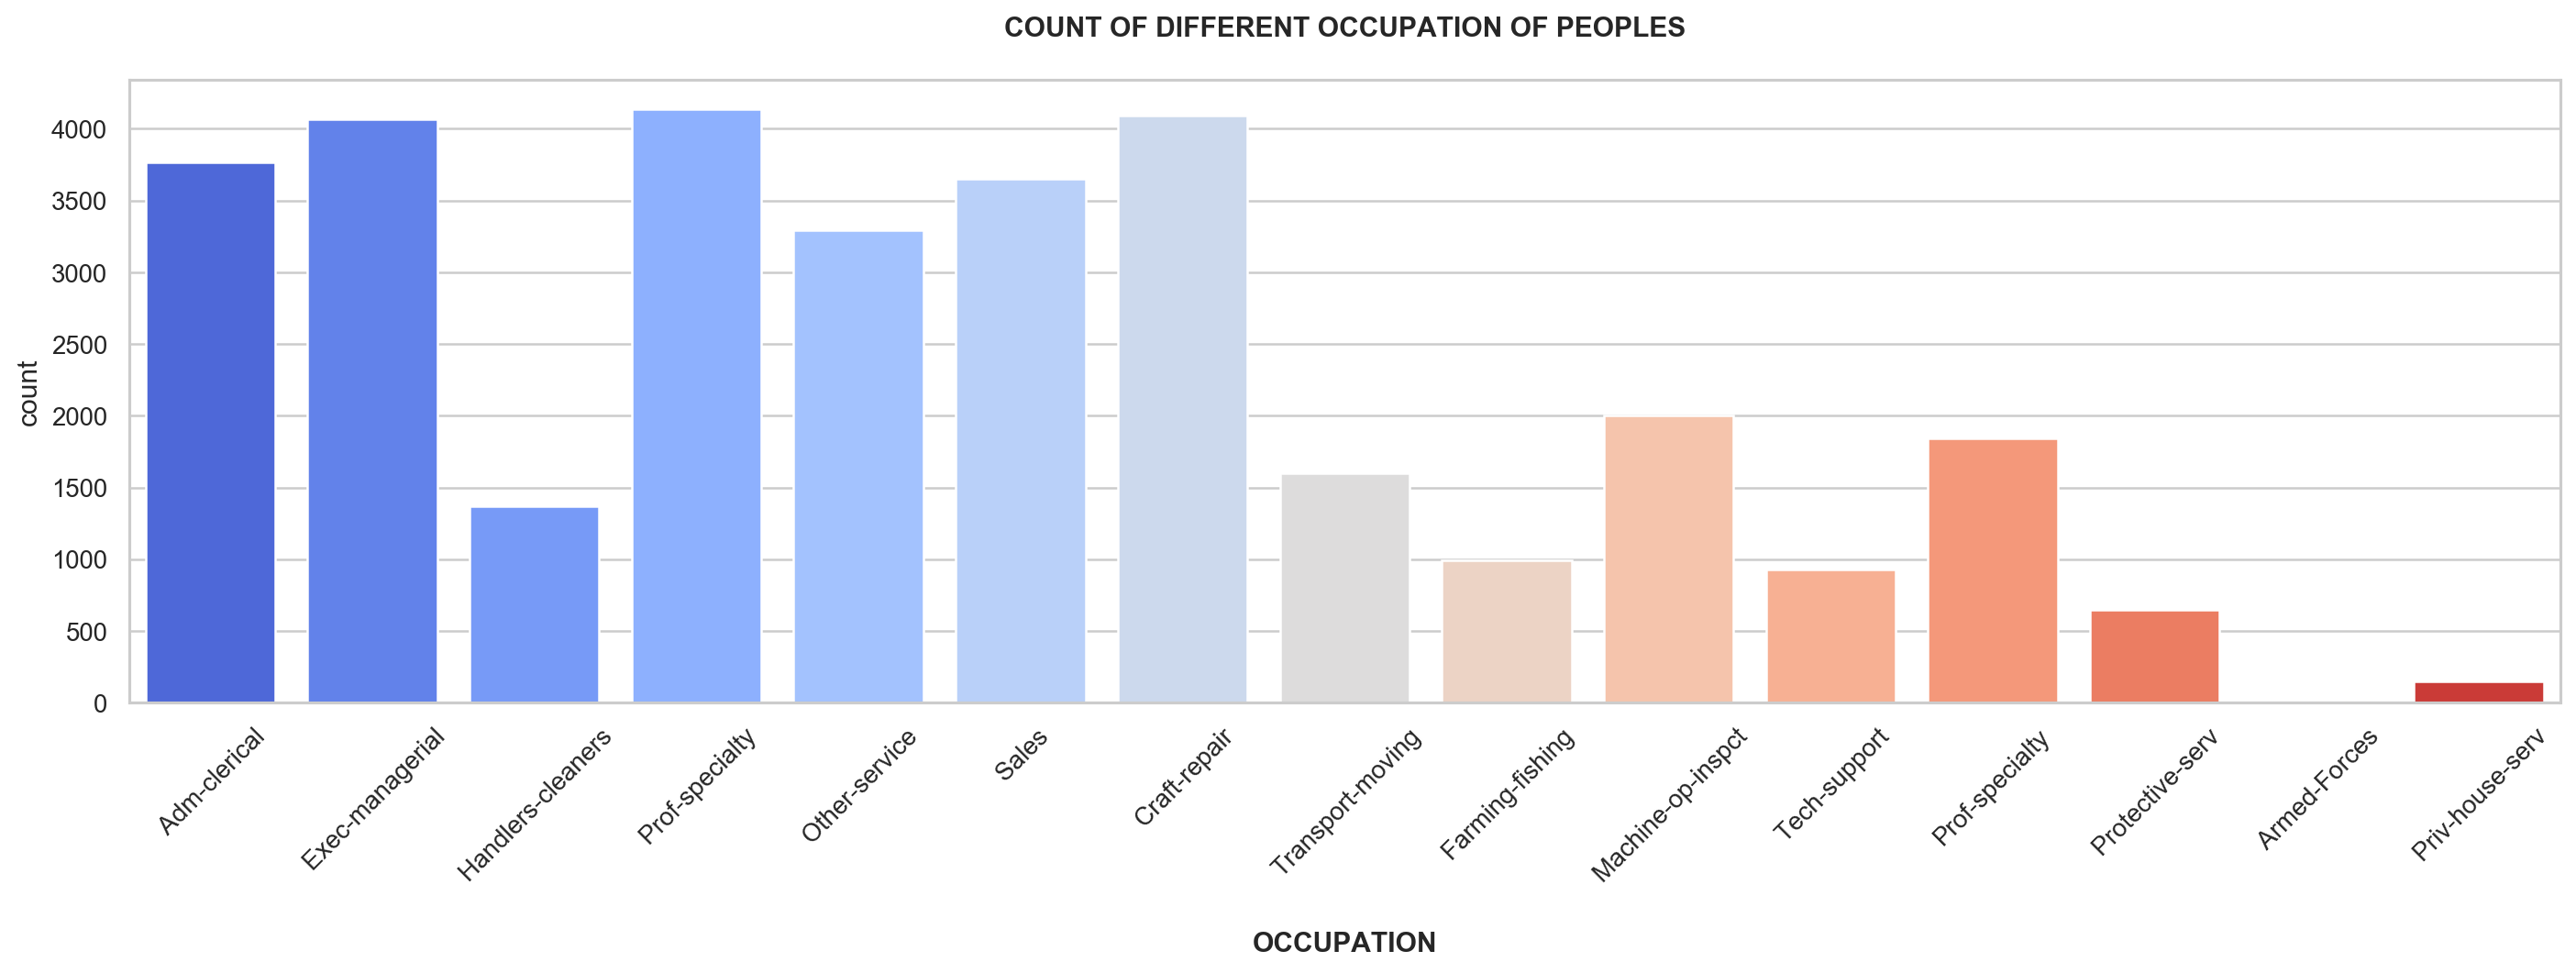

In [34]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
m=sns.countplot(x='occu',data=cen,orient='v',palette='coolwarm',saturation=18)
m.set_xticklabels(m.get_xticklabels(),rotation=45)
plt.xlabel('\nOCCUPATION',weight='bold')
plt.title('COUNT OF DIFFERENT OCCUPATION OF PEOPLES\n',weight='bold')
plt.show()

        THE COUNT OF PEOPLE IN THE OCCUPATION OF CRAFTMANSHIP,PROFESSOR AND EXECUTIVE IS HIGH

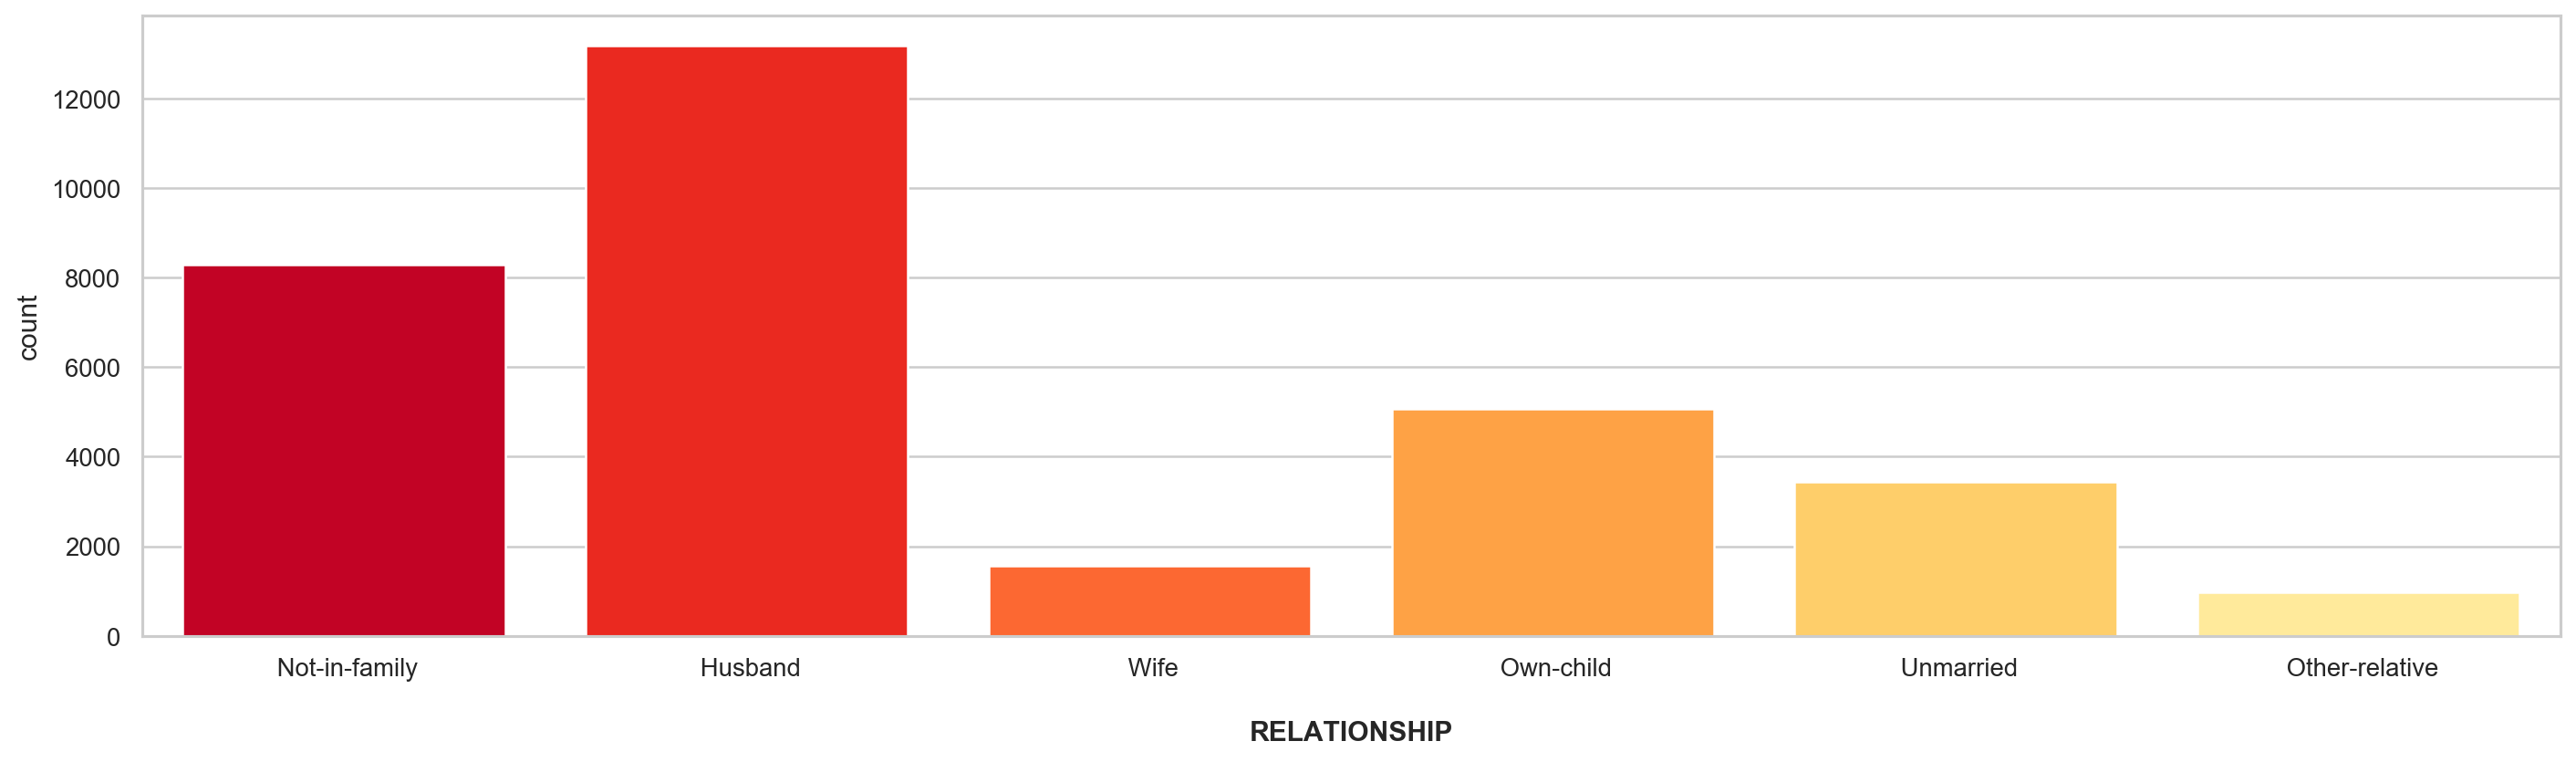

In [35]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.countplot(x='relationship',data=cen,orient='v',palette='YlOrRd_r',saturation=18)
plt.xlabel('\nRELATIONSHIP',weight='bold')
plt.show()

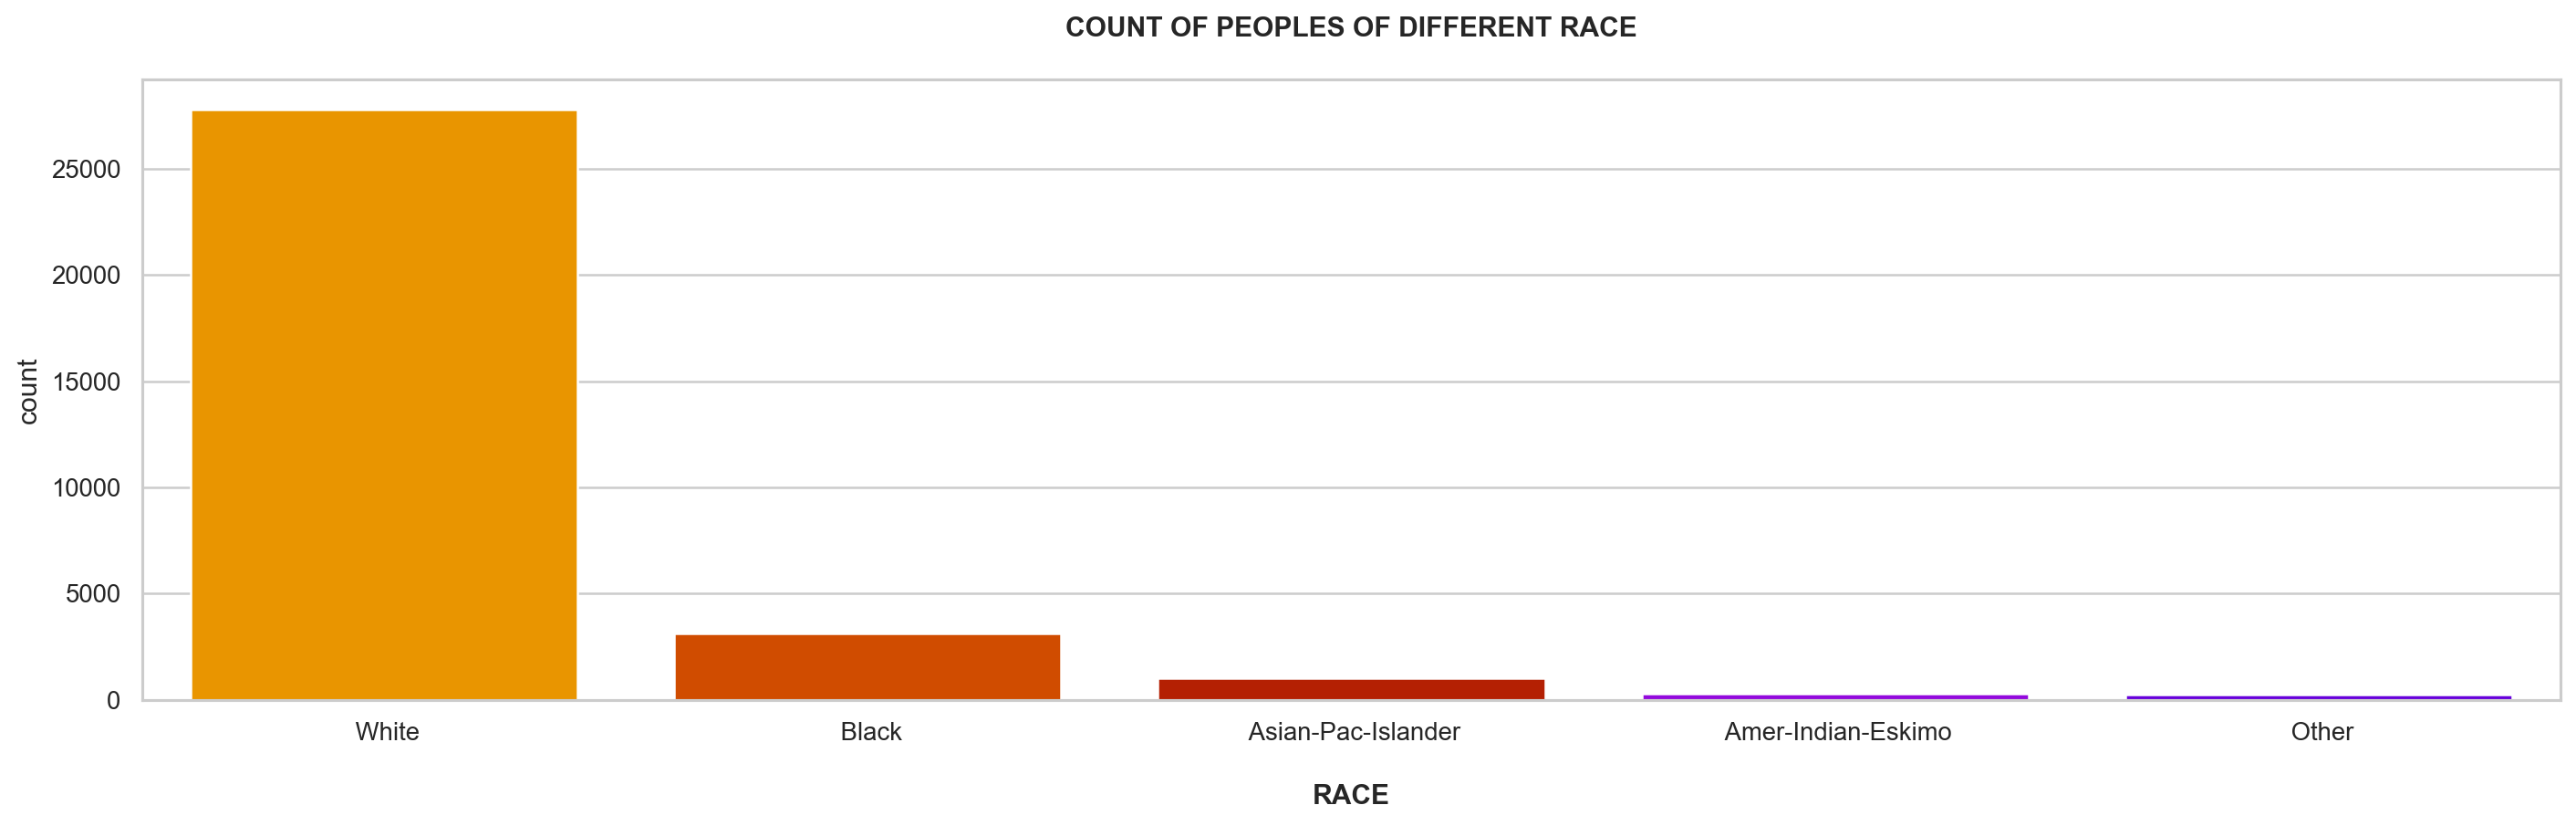

In [36]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.countplot(x='race',data=cen,orient='v',palette='gnuplot_r',saturation=18)
plt.xlabel('\nRACE',weight='bold')
plt.title('COUNT OF PEOPLES OF DIFFERENT RACE\n',weight='bold')
plt.show()

                            THE COUNT OF WHITE PEOPLE ARE HIGH AS COMPARED TO OTHERS

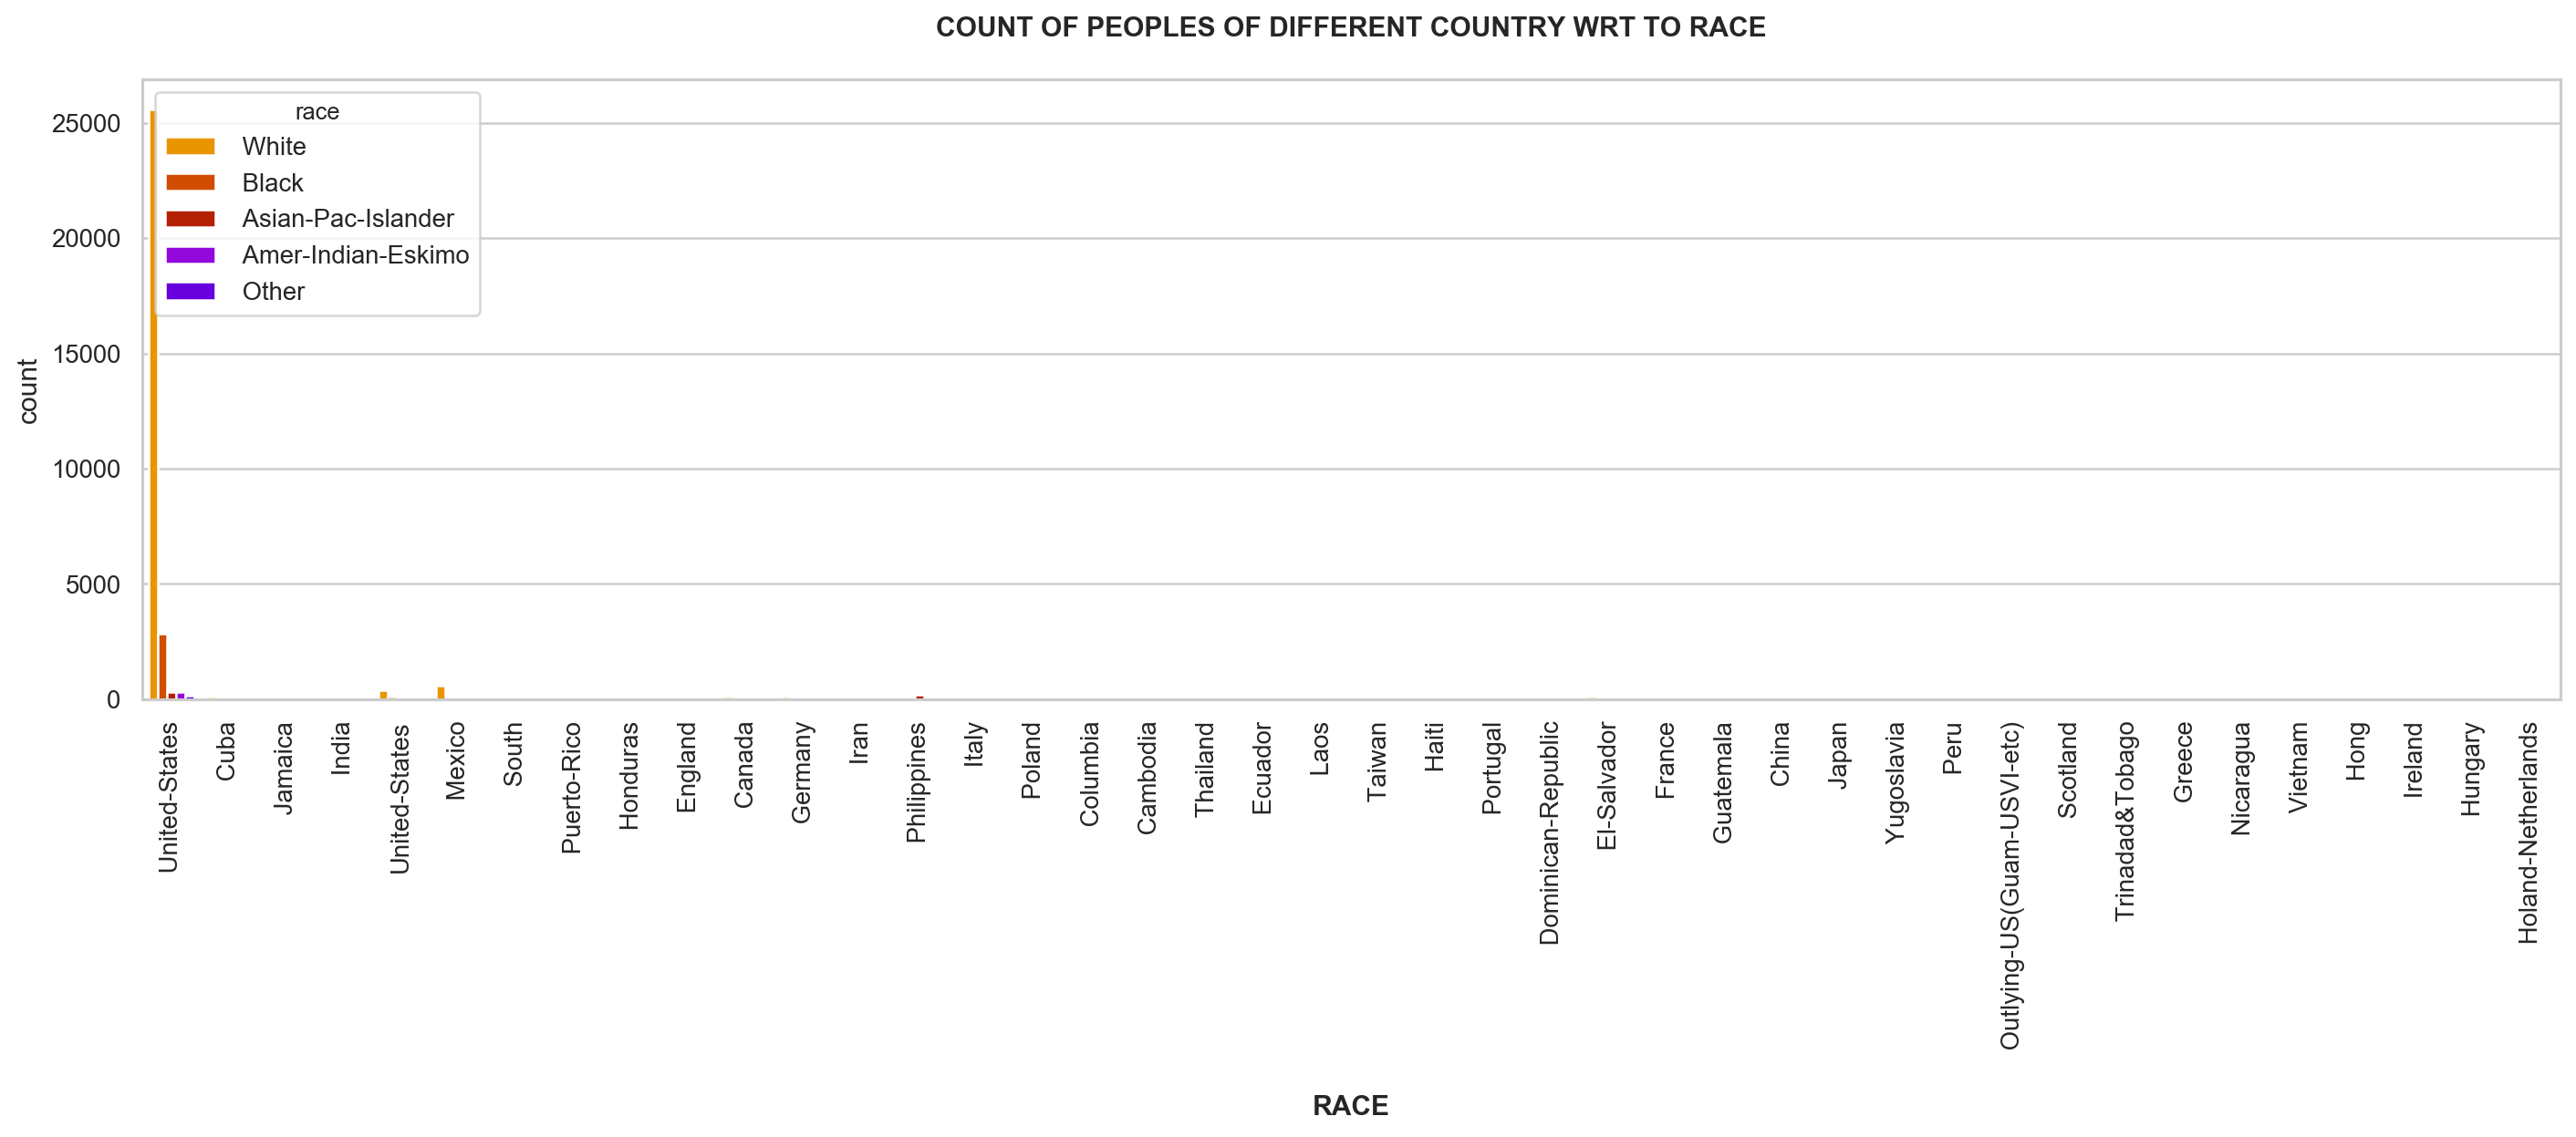

In [37]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
m3=sns.countplot(x='country',hue='race',data=cen,orient='v',palette='gnuplot_r',saturation=18)
m3.set_xticklabels(m3.get_xticklabels(),rotation=90)
plt.xlabel('\nRACE',weight='bold')
plt.title('COUNT OF PEOPLES OF DIFFERENT COUNTRY WRT TO RACE\n',weight='bold')
plt.show()

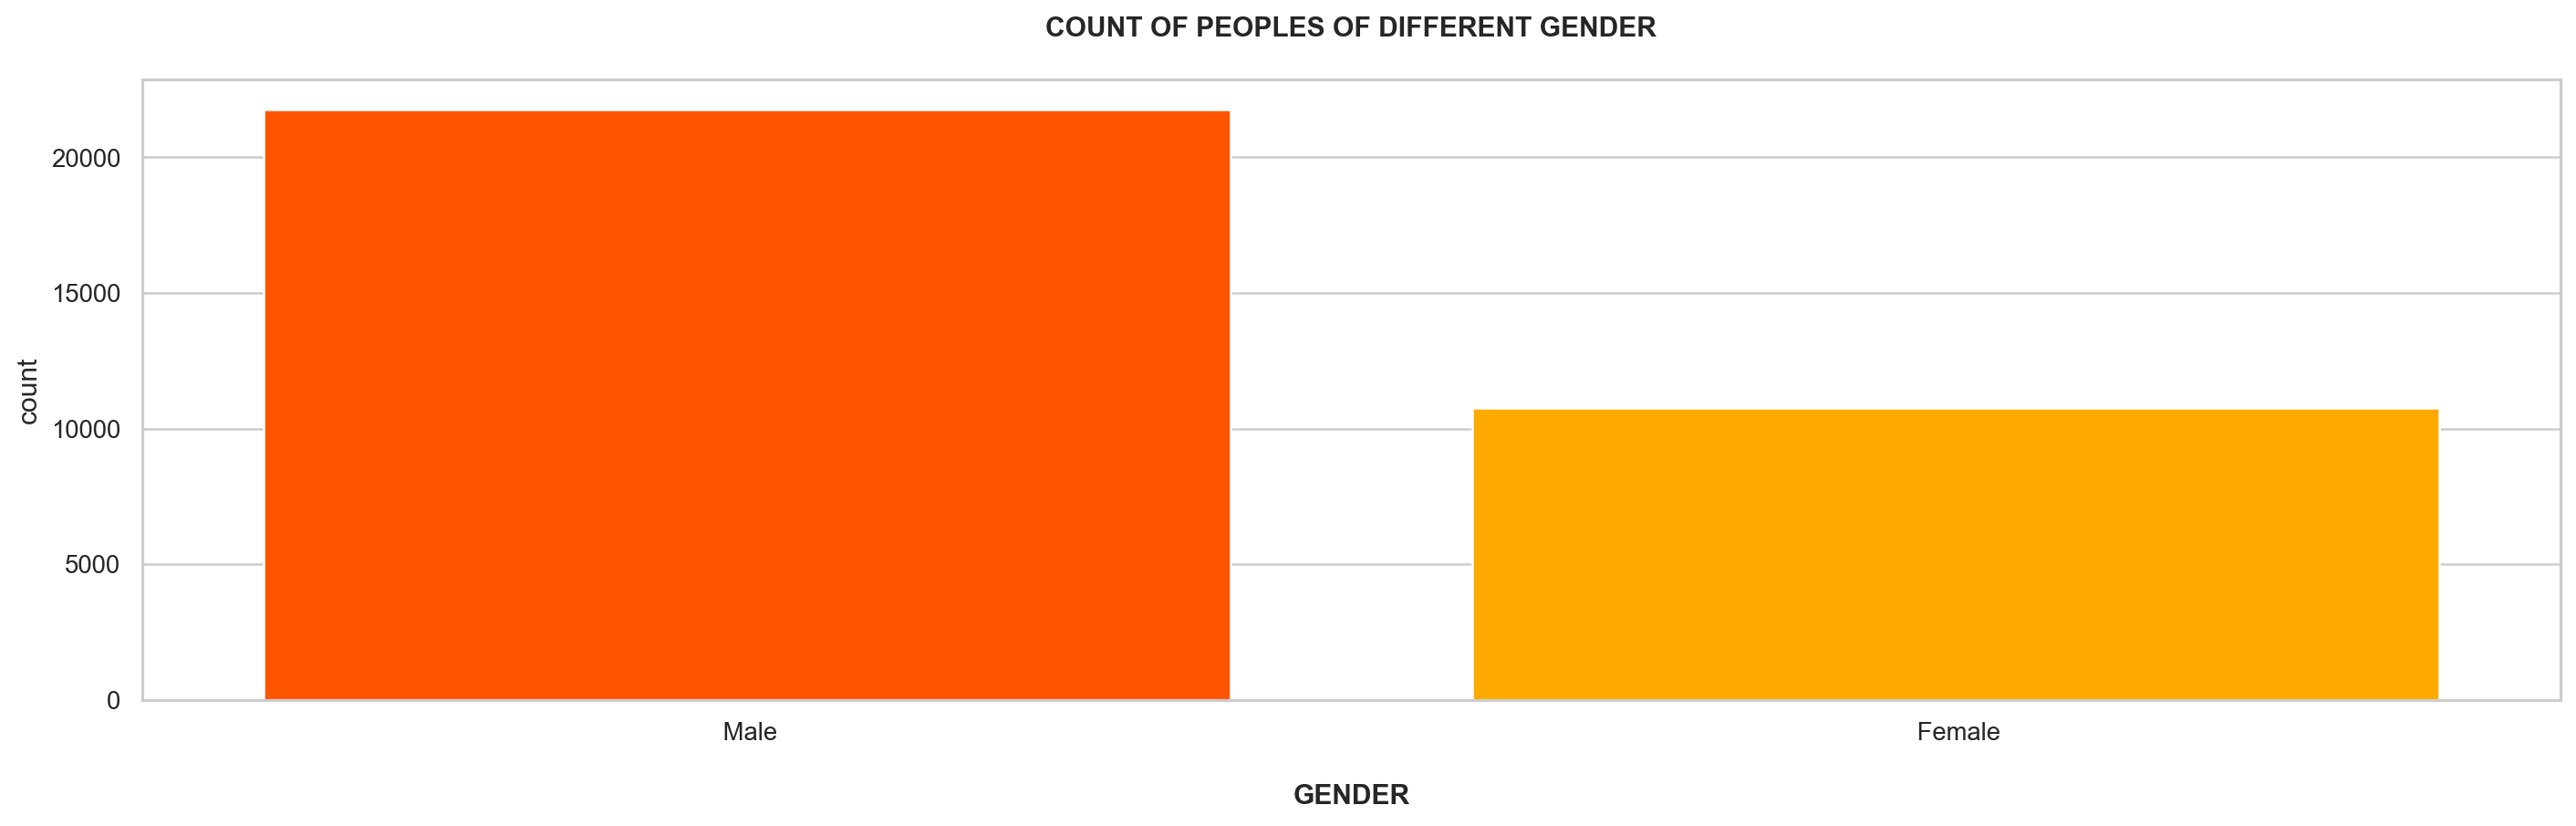

In [38]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.countplot(x='sex',data=cen,orient='v',palette='autumn',saturation=18)
plt.xlabel('\nGENDER',weight='bold')
plt.title('COUNT OF PEOPLES OF DIFFERENT GENDER\n',weight='bold')
plt.show()

                                THE COUNT OF MALE IS HIGH AS COMAPRED TO FEMALES

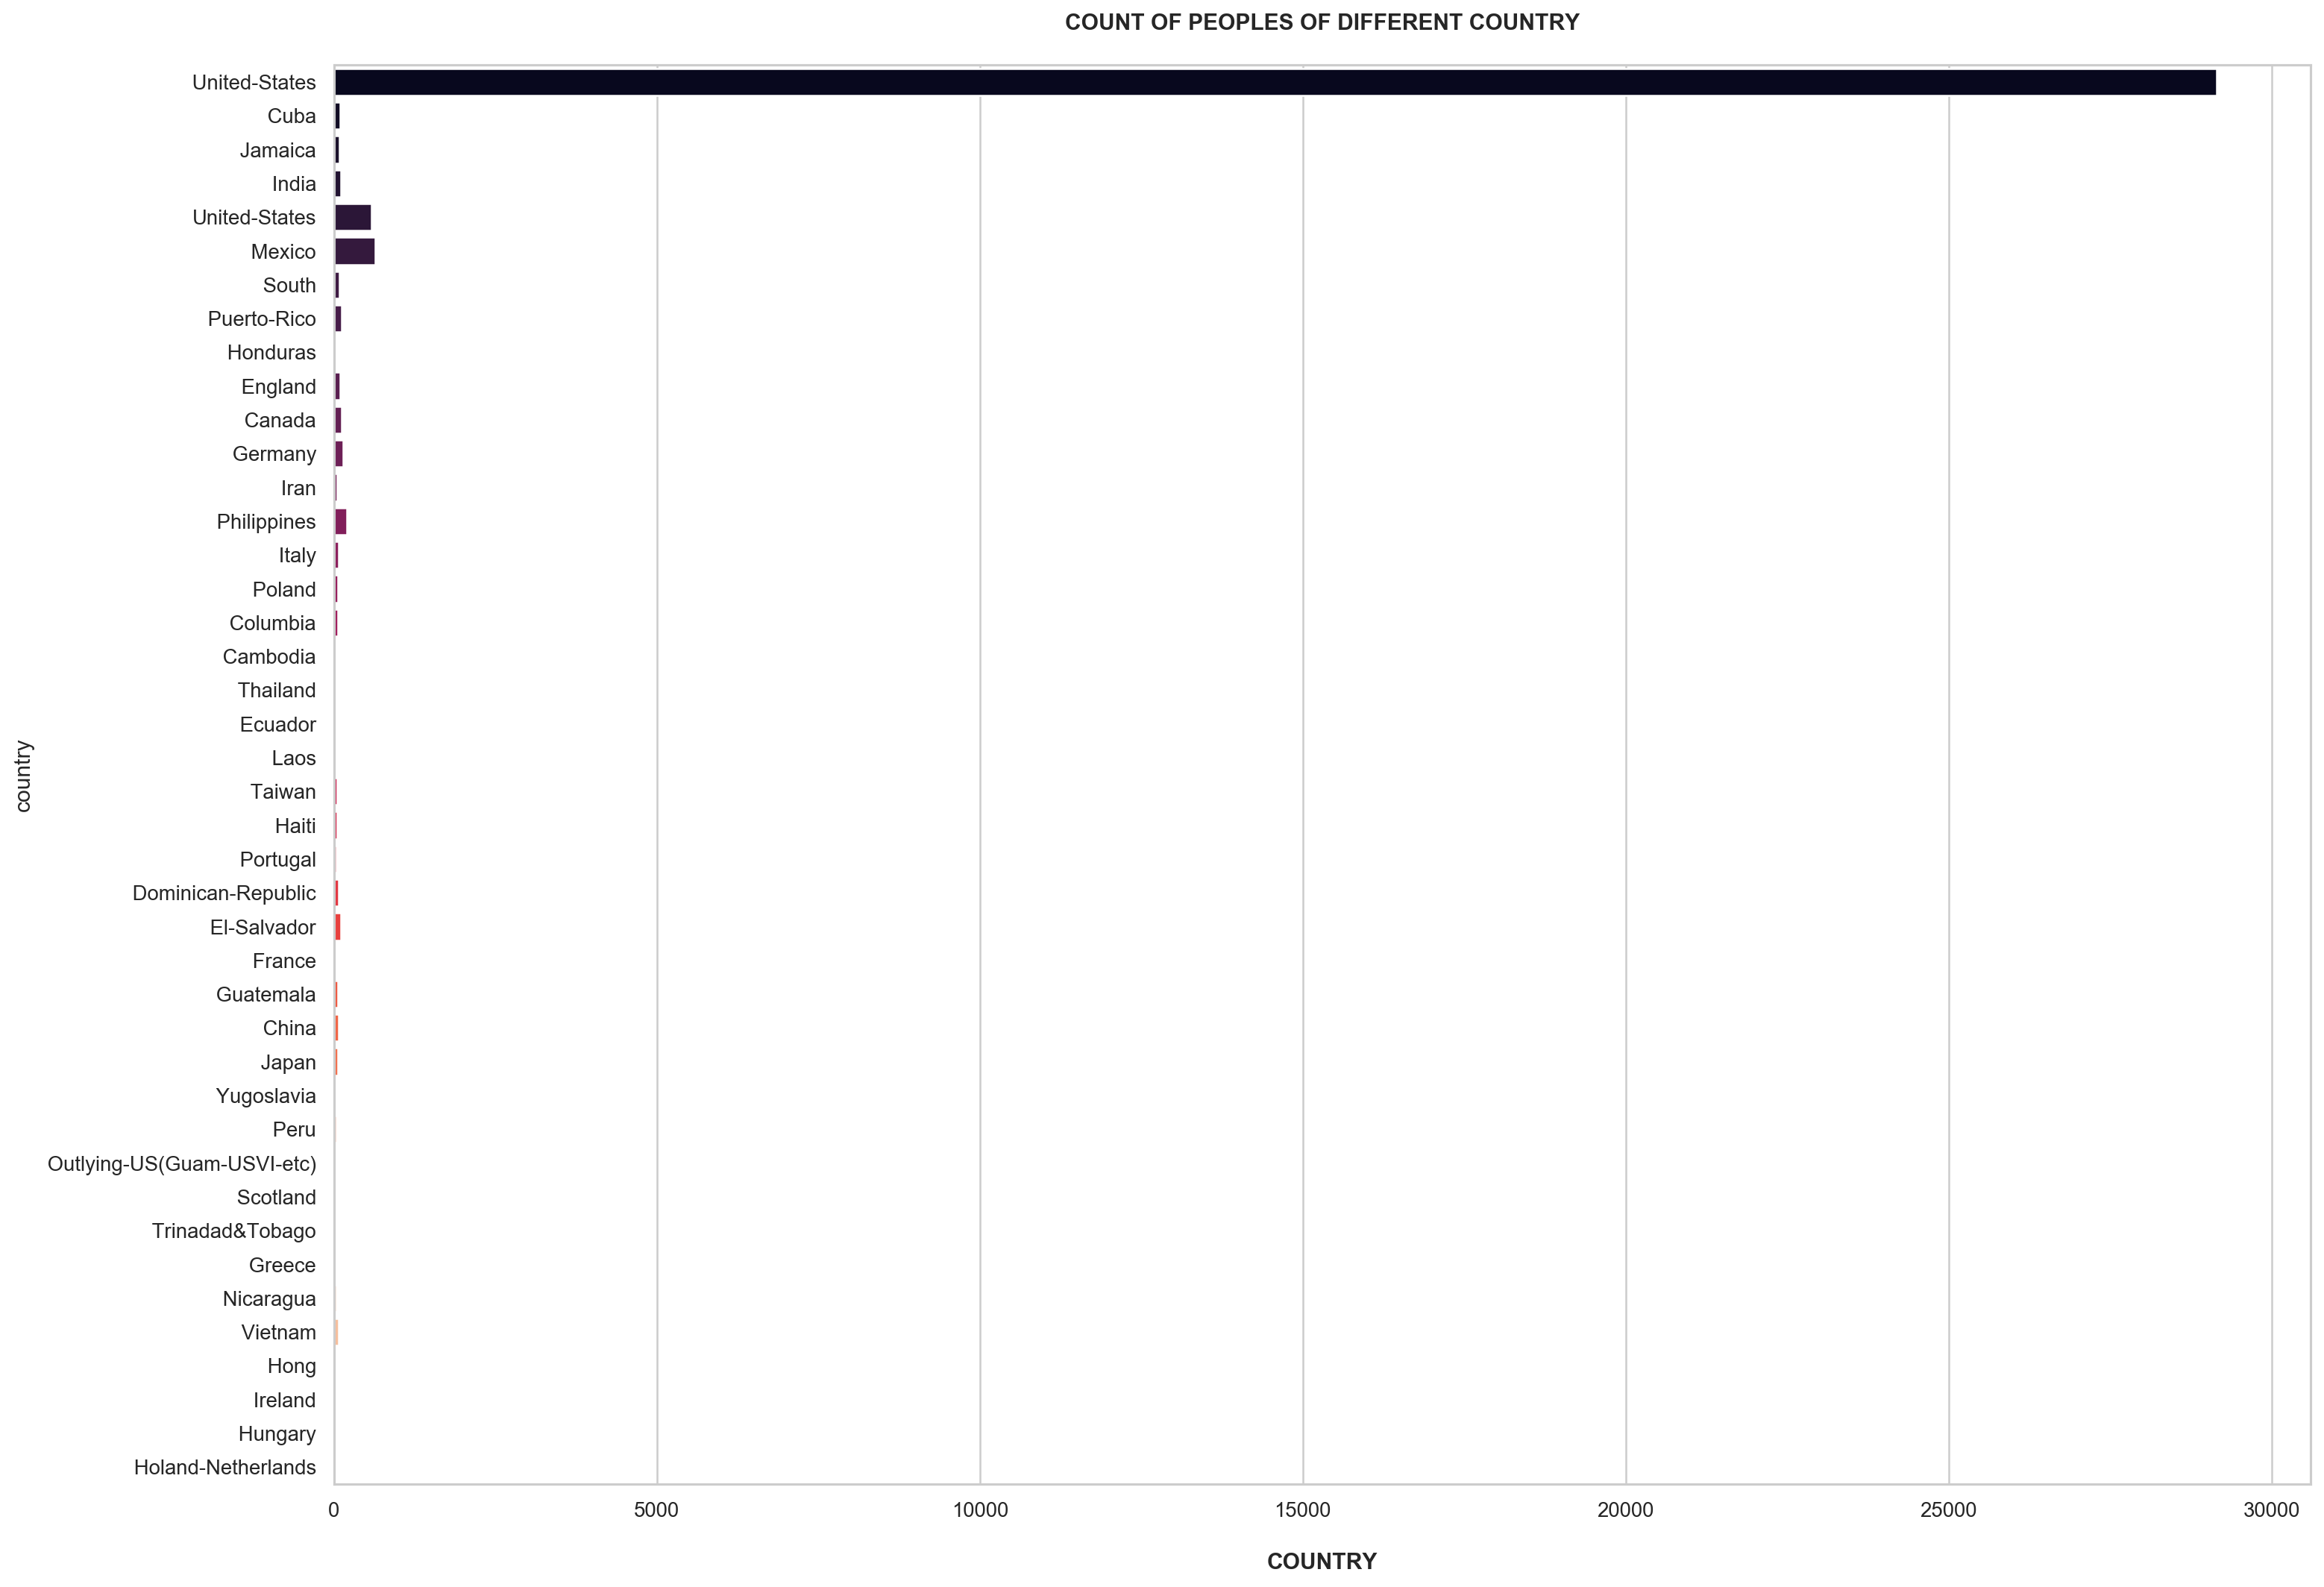

In [39]:
plt.figure(figsize=(19,14),dpi=180)
sns.set_context('talk',font_scale=2.9)
sns.set(style='whitegrid')
sns.countplot(y='country',data=cen,orient='H',palette='rocket',saturation=18)
plt.xlabel('\nCOUNTRY',weight='bold')
plt.title('COUNT OF PEOPLES OF DIFFERENT COUNTRY\n',weight='bold')
plt.show()

                                    THE COUNT OF PEOPLE FROM US IS HIGH

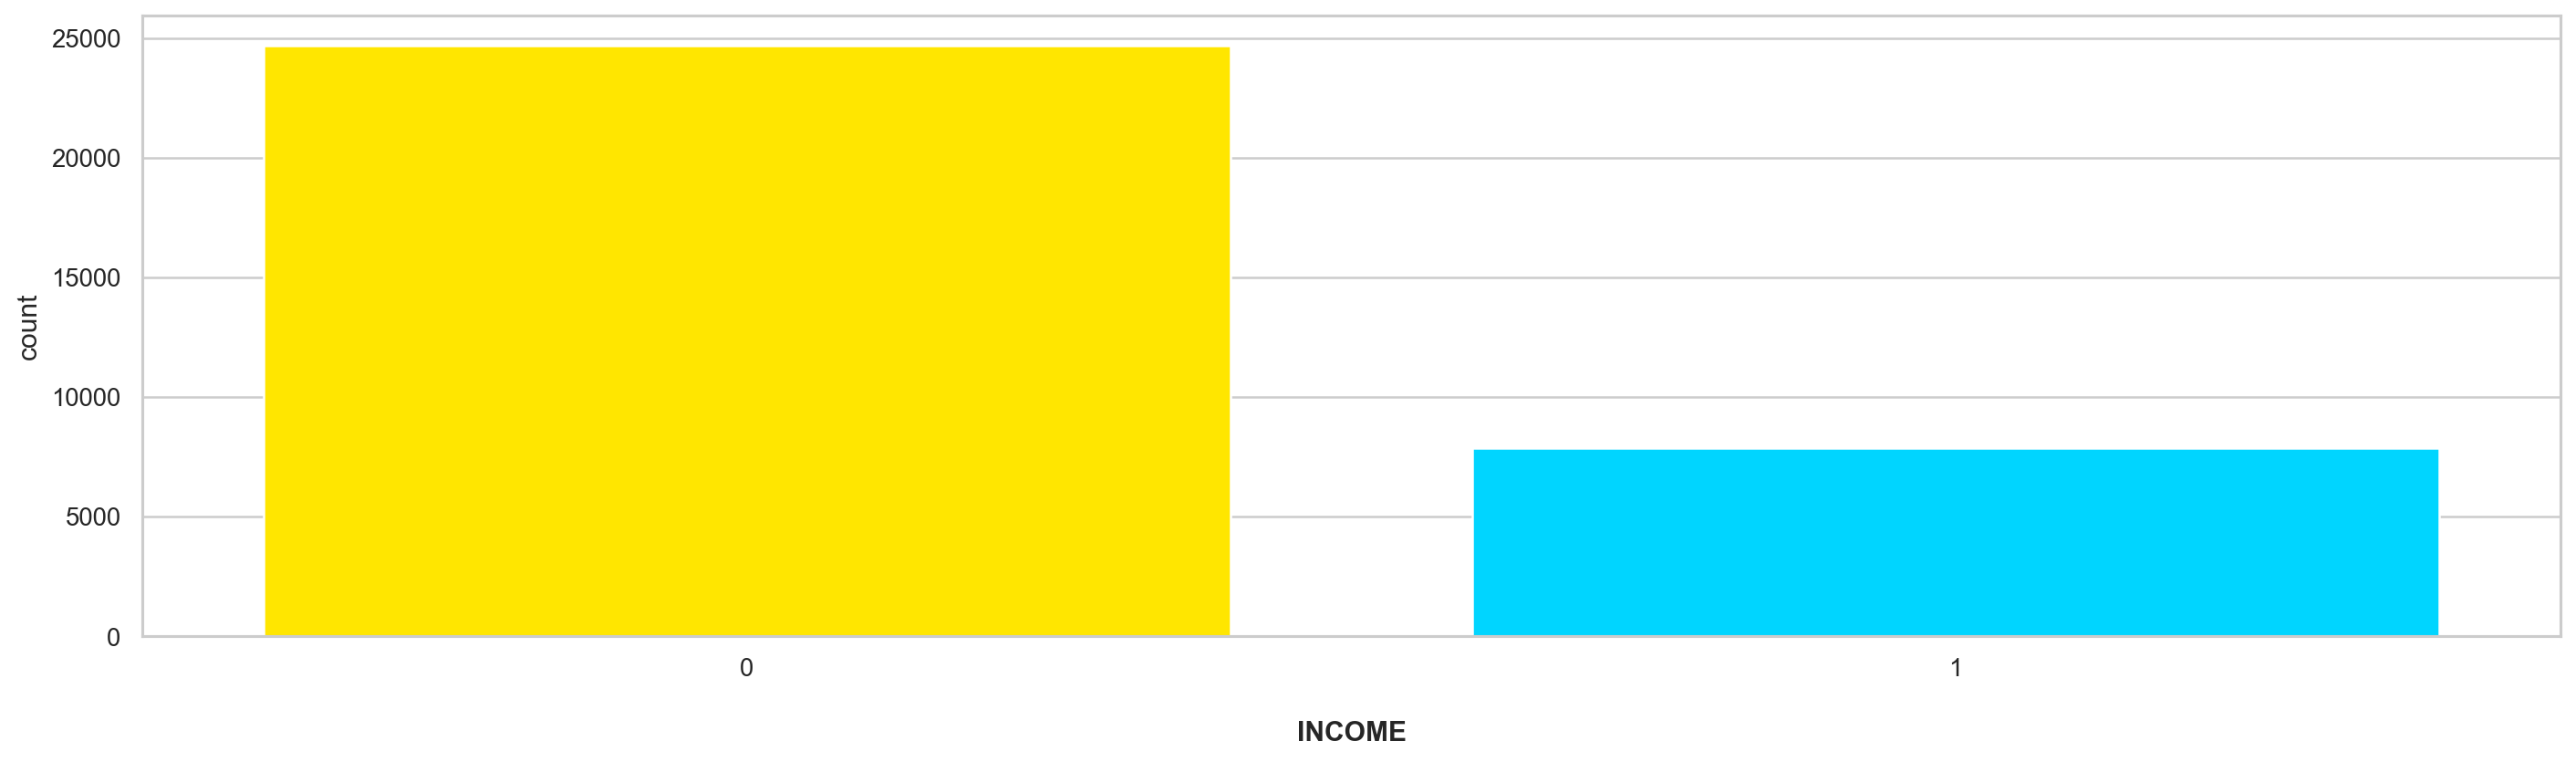

In [40]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.countplot(x='income',data=cen,orient='v',palette='jet_r',saturation=18)
plt.xlabel('\nINCOME',weight='bold')
plt.show()

                        A VERY SMALL PROPERTION OF PEOPLE EARN 50K OR MORE THAN THAT YEARLY

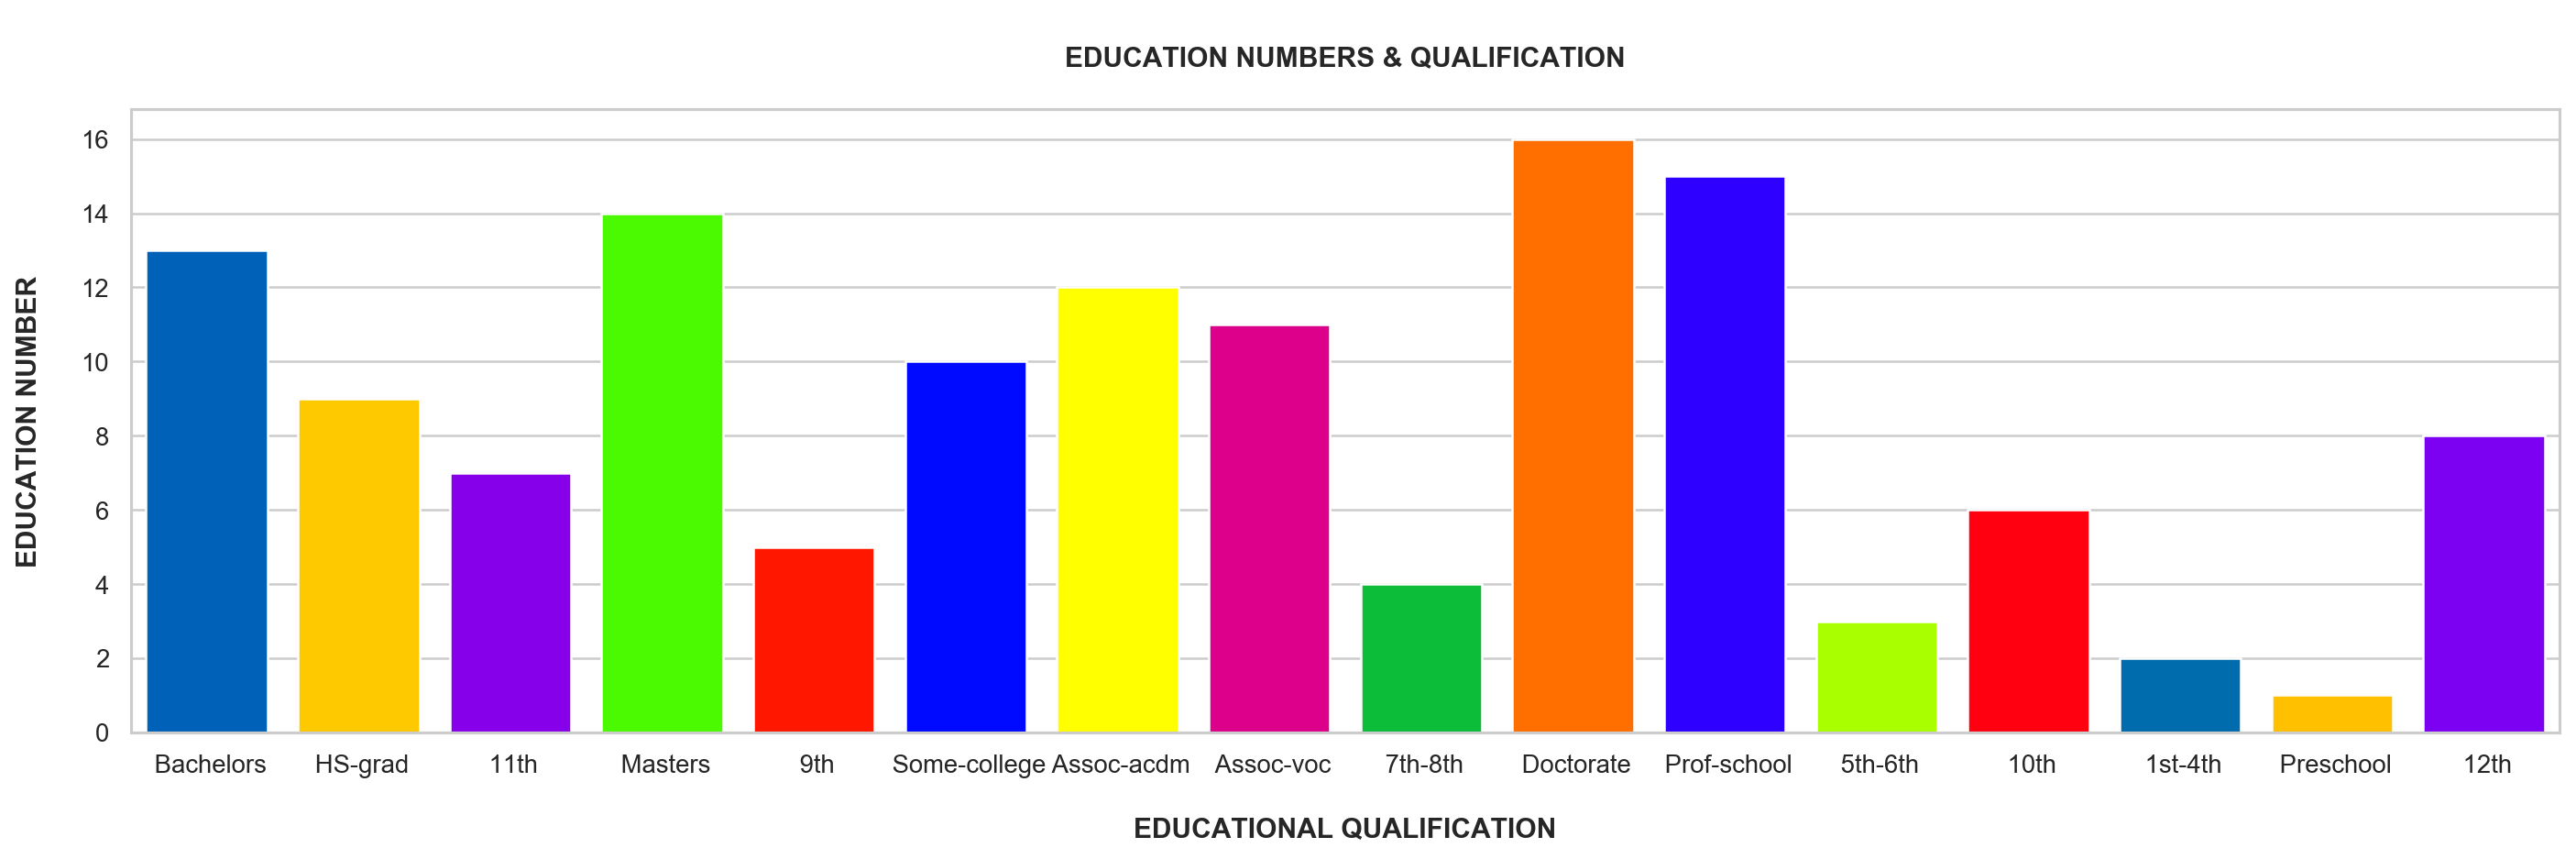

In [41]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.barplot(x='edu', y='edu_num', data=cen,ci=75,orient='v',palette='prism',saturation=25,errcolor='forestgreen',errwidth=2)
plt.xlabel('\nEDUCATIONAL QUALIFICATION',weight='bold')
plt.ylabel('EDUCATION NUMBER\n ',weight='bold')
plt.title(' \nEDUCATION NUMBERS & QUALIFICATION\n',weight='bold')
plt.show()

                            VISUALIZING THE EDUCATIONAL QUALIFICATION AND NUMBER CORRESPONDING TO THAT

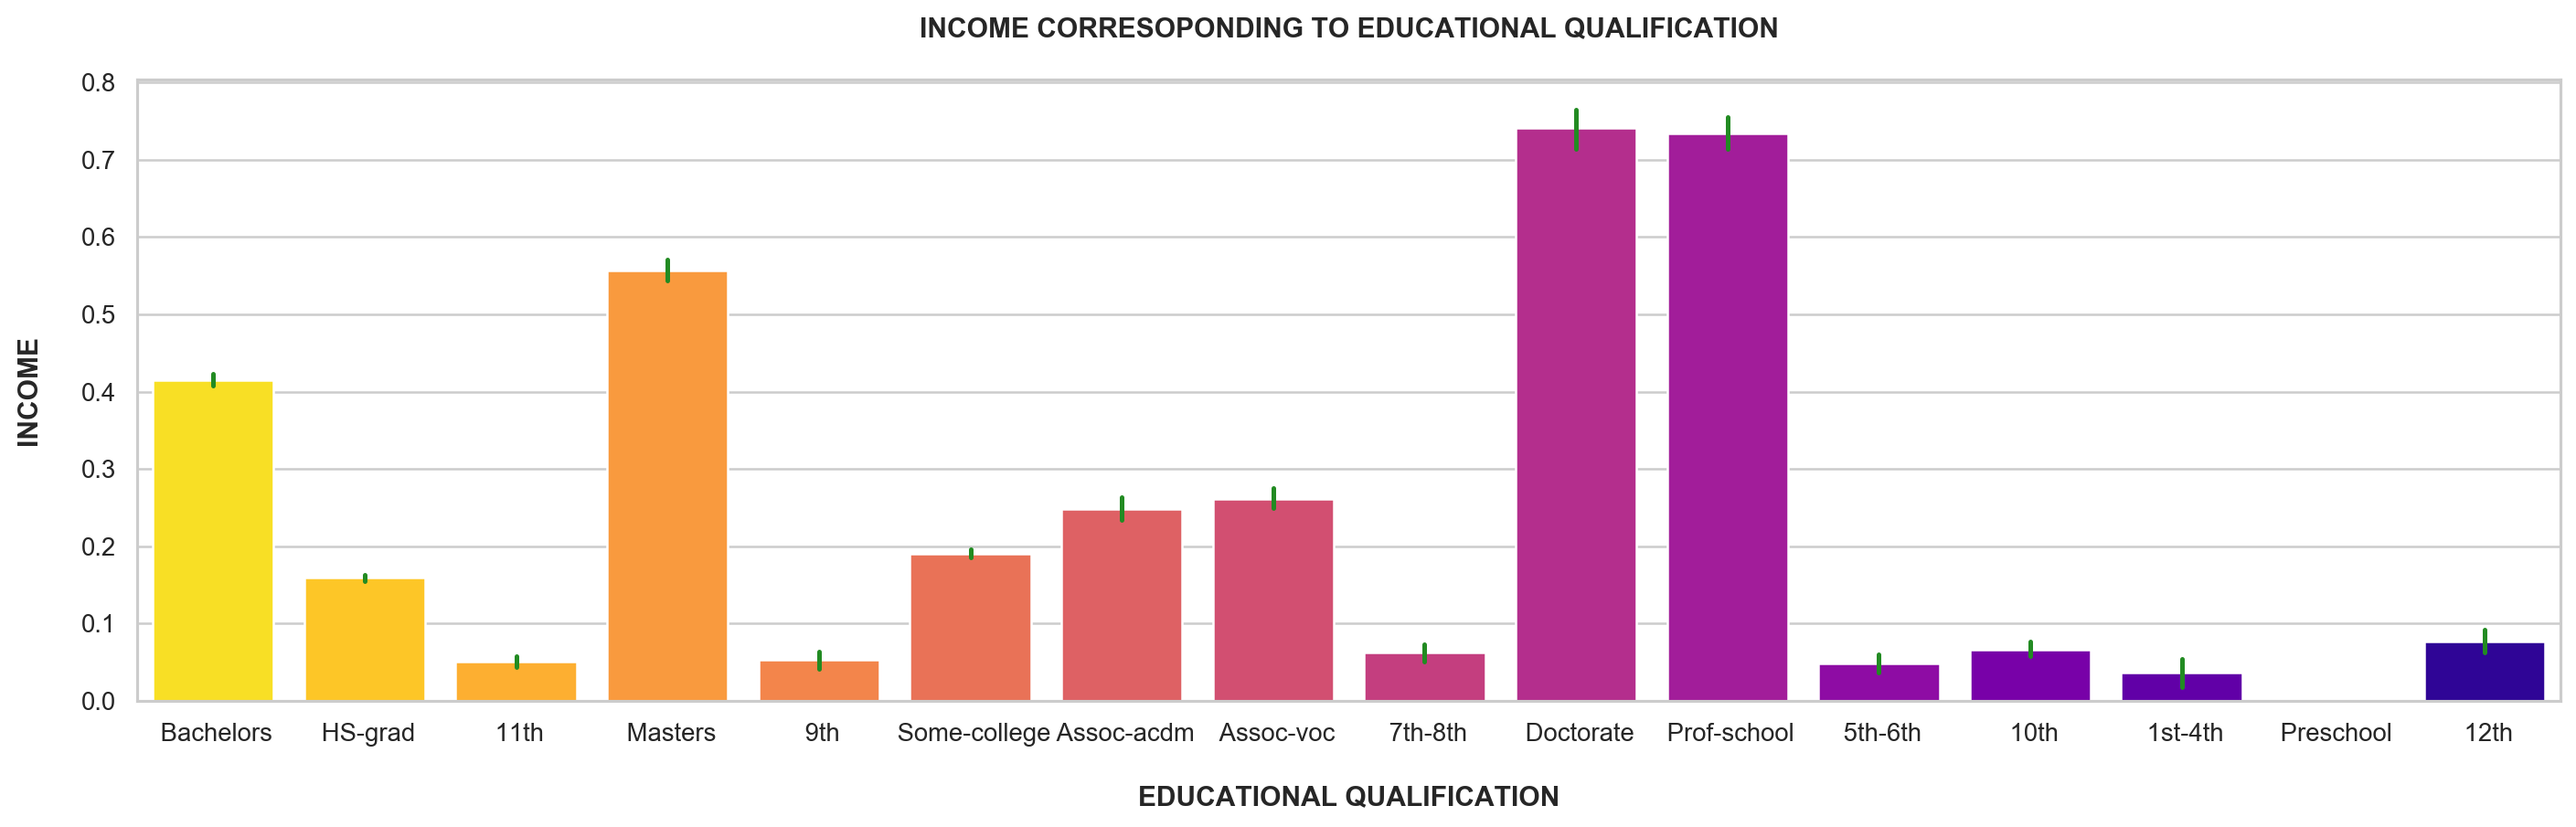

In [42]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.barplot(x='edu', y='income',data=cen,ci=75,orient='v',palette='plasma_r',saturation=25,errcolor='forestgreen',errwidth=2)
plt.xlabel('\nEDUCATIONAL QUALIFICATION',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.title('INCOME CORRESOPONDING TO EDUCATIONAL QUALIFICATION\n',weight='bold')
plt.show()

                                PLOT IS SHOWING THAT PEOPLE WITH DOCTORATE EARNS A LOT

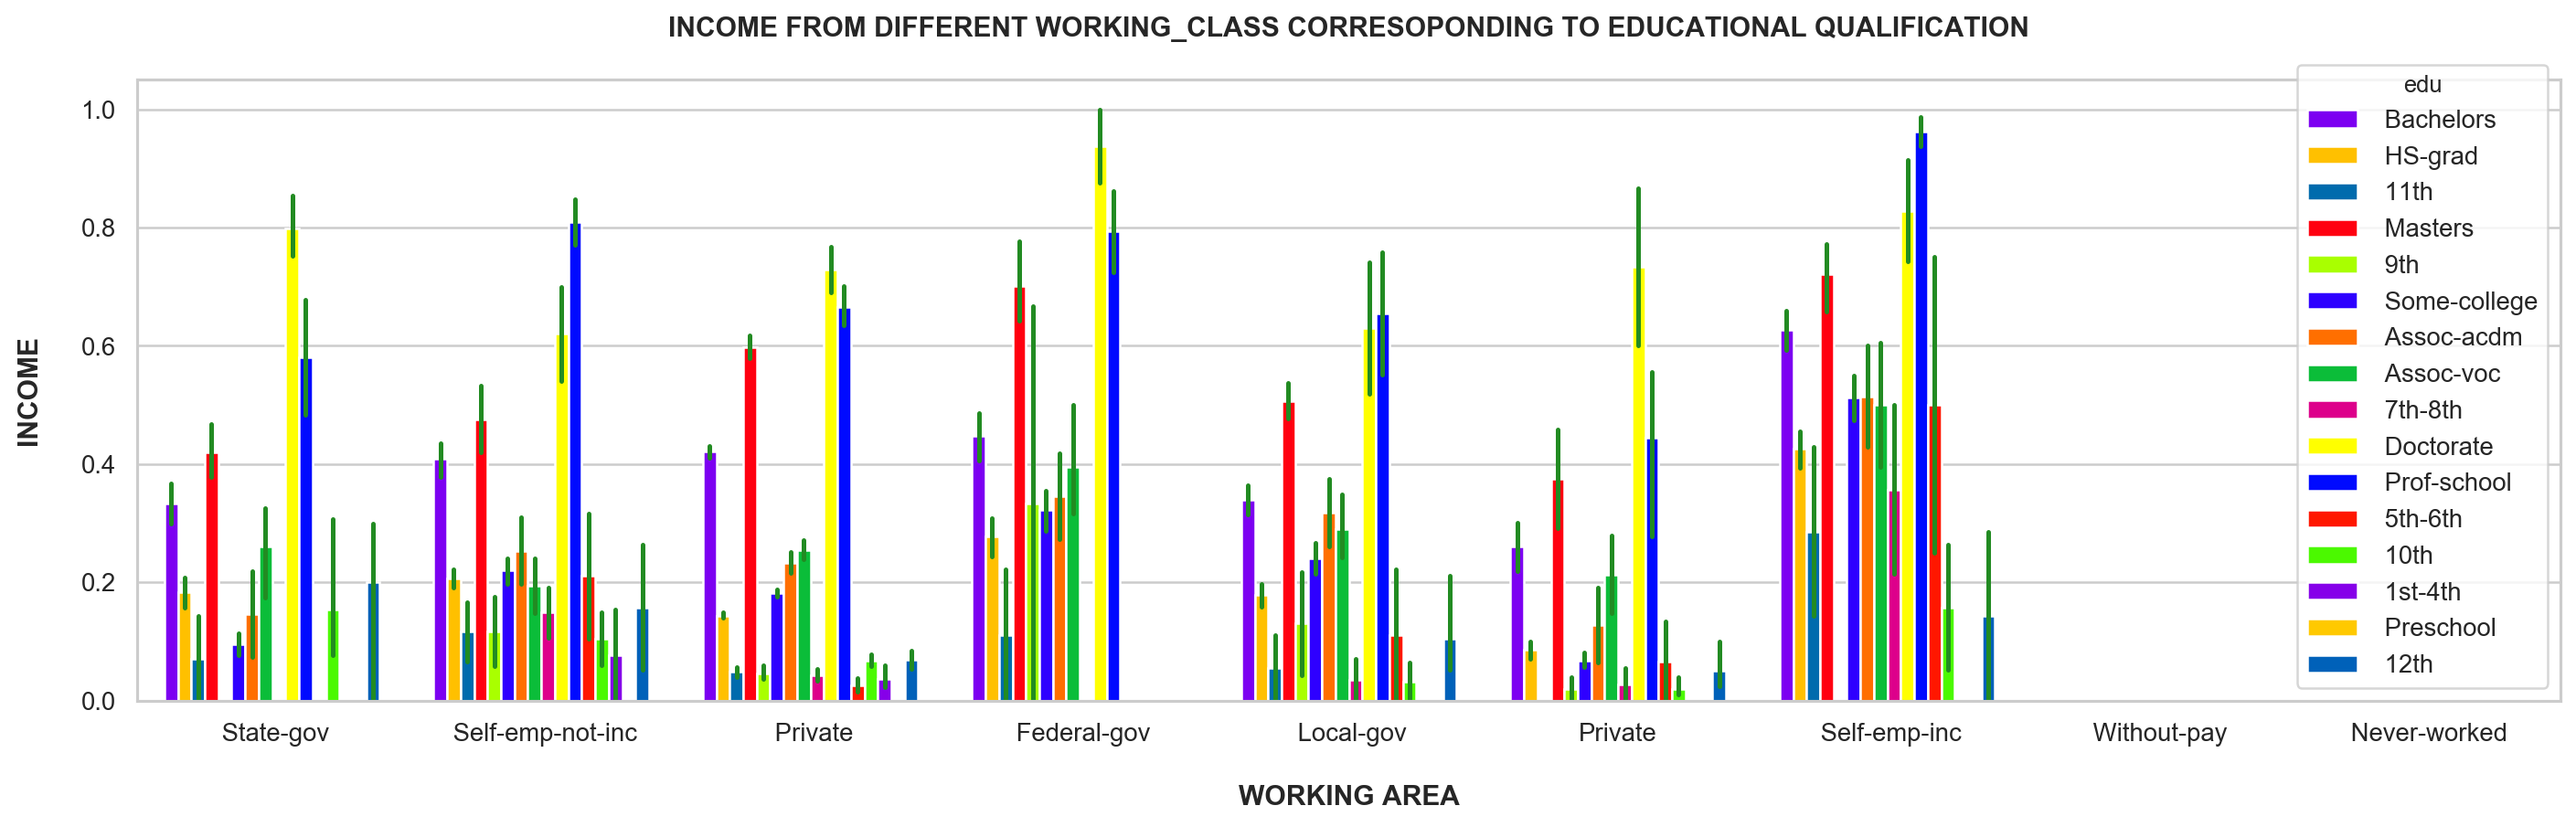

In [43]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.barplot(x='workclass',y='income',hue='edu',data=cen,ci=75,orient='v',palette='prism_r',saturation=25,errcolor='forestgreen',errwidth=2)
plt.xlabel('\nWORKING AREA',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.title('INCOME FROM DIFFERENT WORKING_CLASS CORRESOPONDING TO EDUCATIONAL QUALIFICATION\n',weight='bold')
plt.show()

IN THE AREA OF FEDERAL GOV AND SELF_EMP PEOPLE WITH DOCTORATE DEGREE AND SCHOOL PROFESSOR EARNS A GOOD AMOUNT RESPECTIVELY

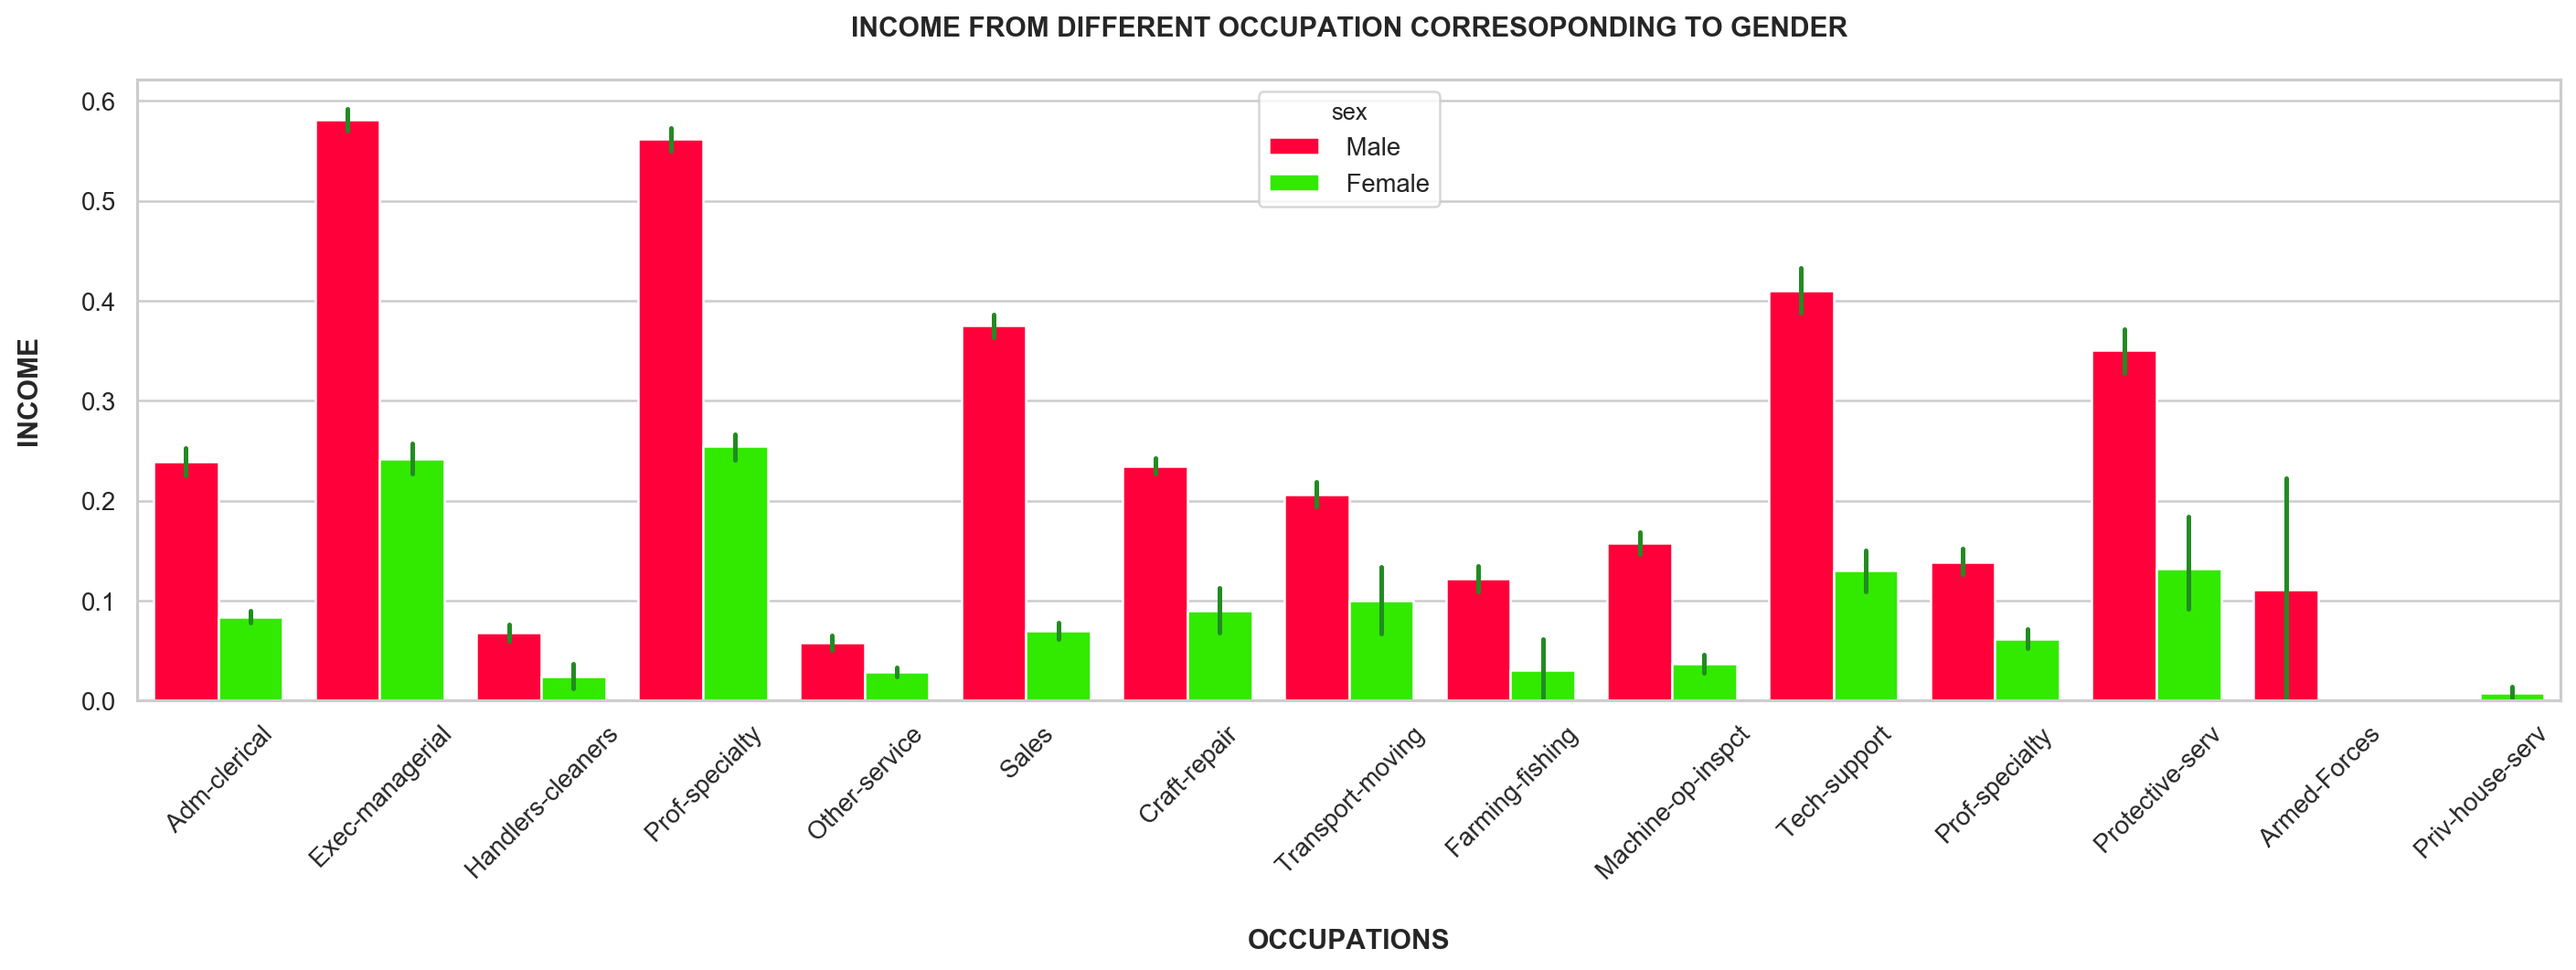

In [44]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
m2=sns.barplot(x='occu',y='income',hue='sex',data=cen,ci=75,orient='v',palette='prism_r',saturation=25,errcolor='forestgreen',errwidth=2)
m2.set_xticklabels(m2.get_xticklabels(),rotation=45)
plt.xlabel('\nOCCUPATIONS',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.title('INCOME FROM DIFFERENT OCCUPATION CORRESOPONDING TO GENDER\n',weight='bold')
plt.show()

                    IN THE OCCUPATIONS OF EXECUTIVE MALE EARNS A LOT AS COMPARED TO OTHERS 

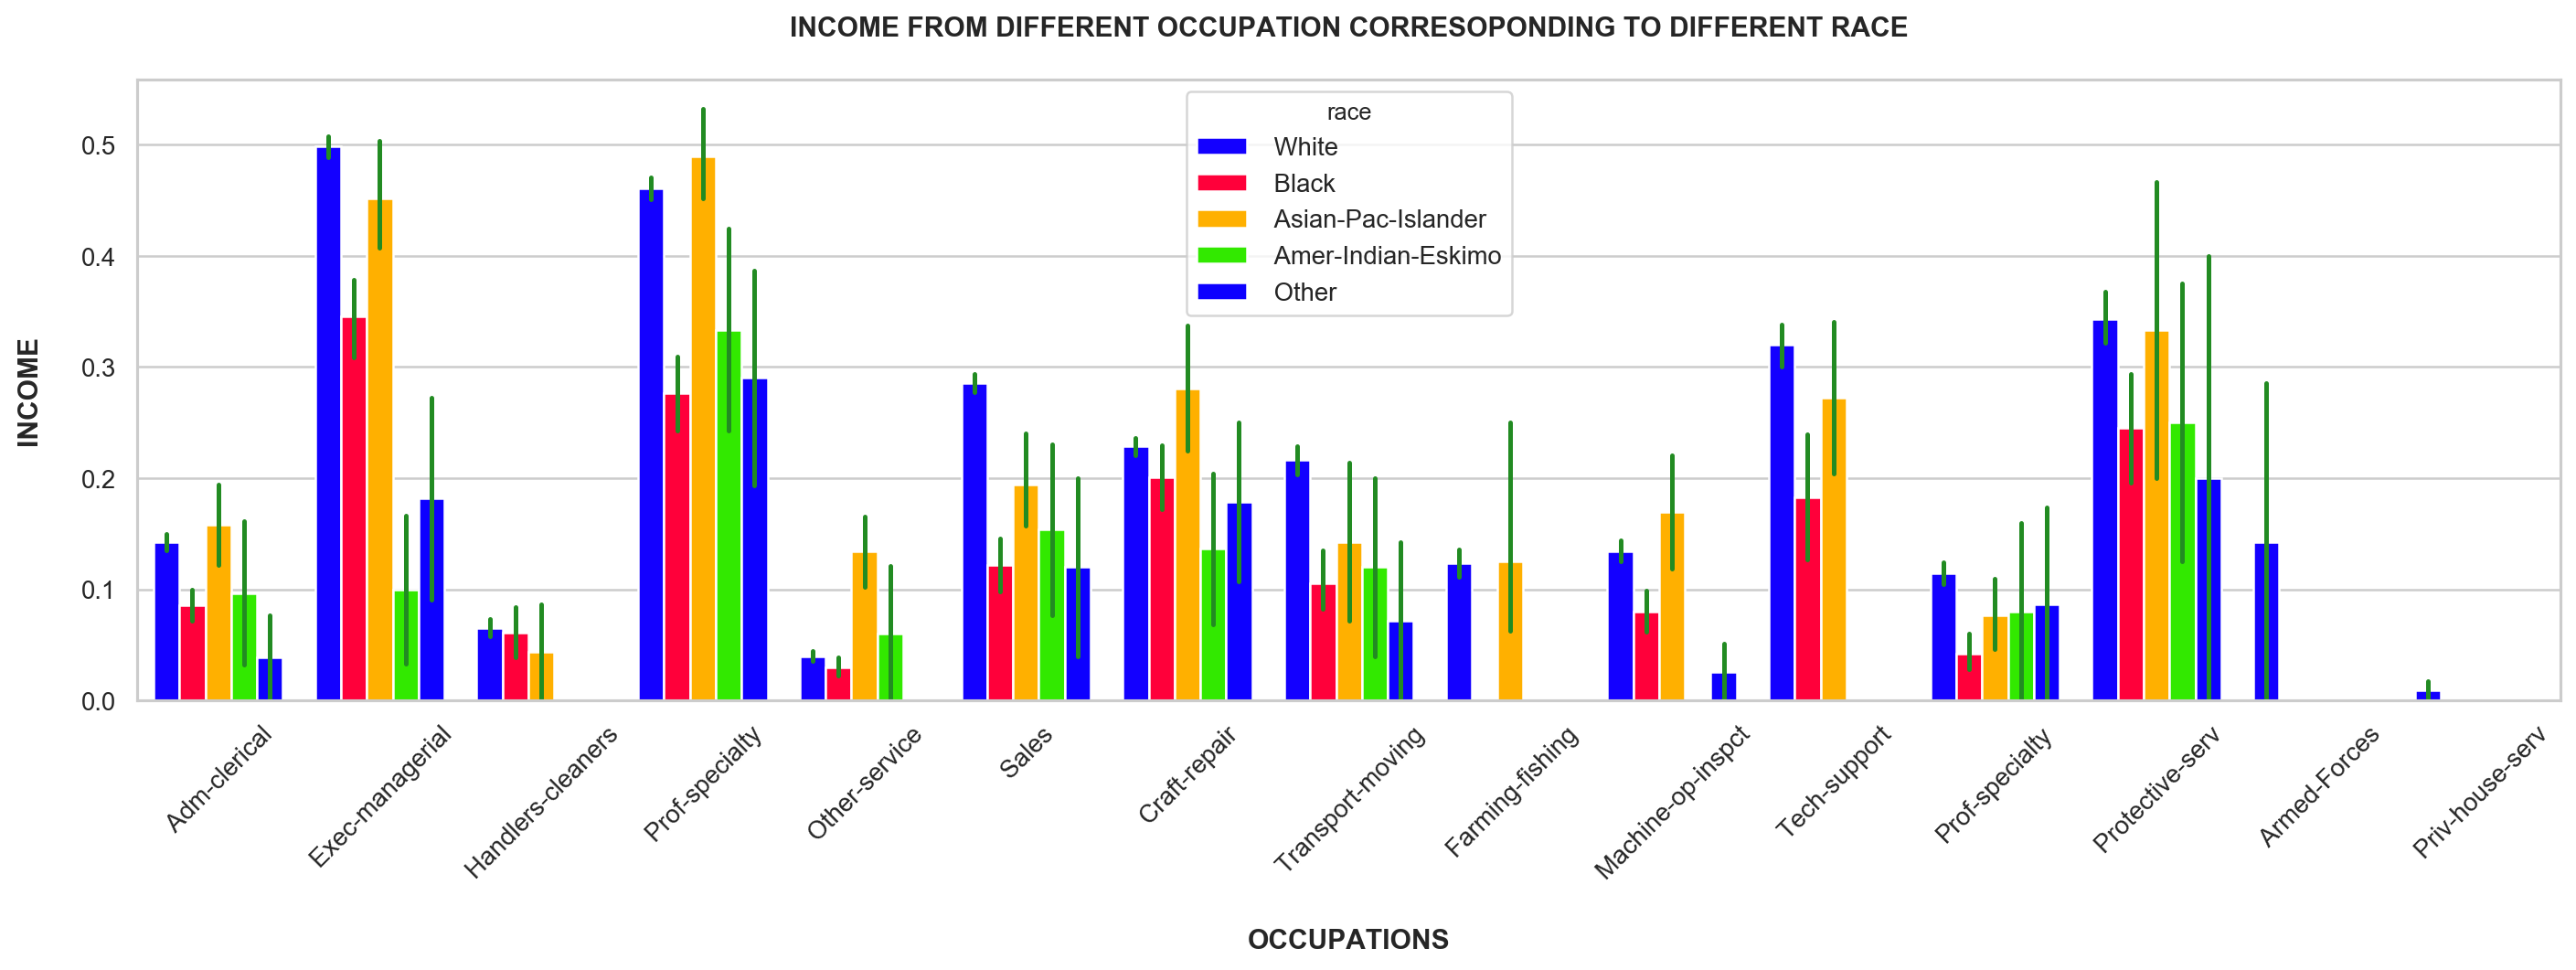

In [45]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
m2=sns.barplot(x='occu',y='income',hue='race',data=cen,ci=75,orient='v',palette='prism_r',saturation=25,errcolor='forestgreen',errwidth=2)
m2.set_xticklabels(m2.get_xticklabels(),rotation=45)
plt.xlabel('\nOCCUPATIONS',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.title('INCOME FROM DIFFERENT OCCUPATION CORRESOPONDING TO DIFFERENT RACE\n',weight='bold')
plt.show()

                        THE WHITE & THE ASIAN_PACIFIC_ISLANDER PEOPLE ARE THE HIGHEST EARNER

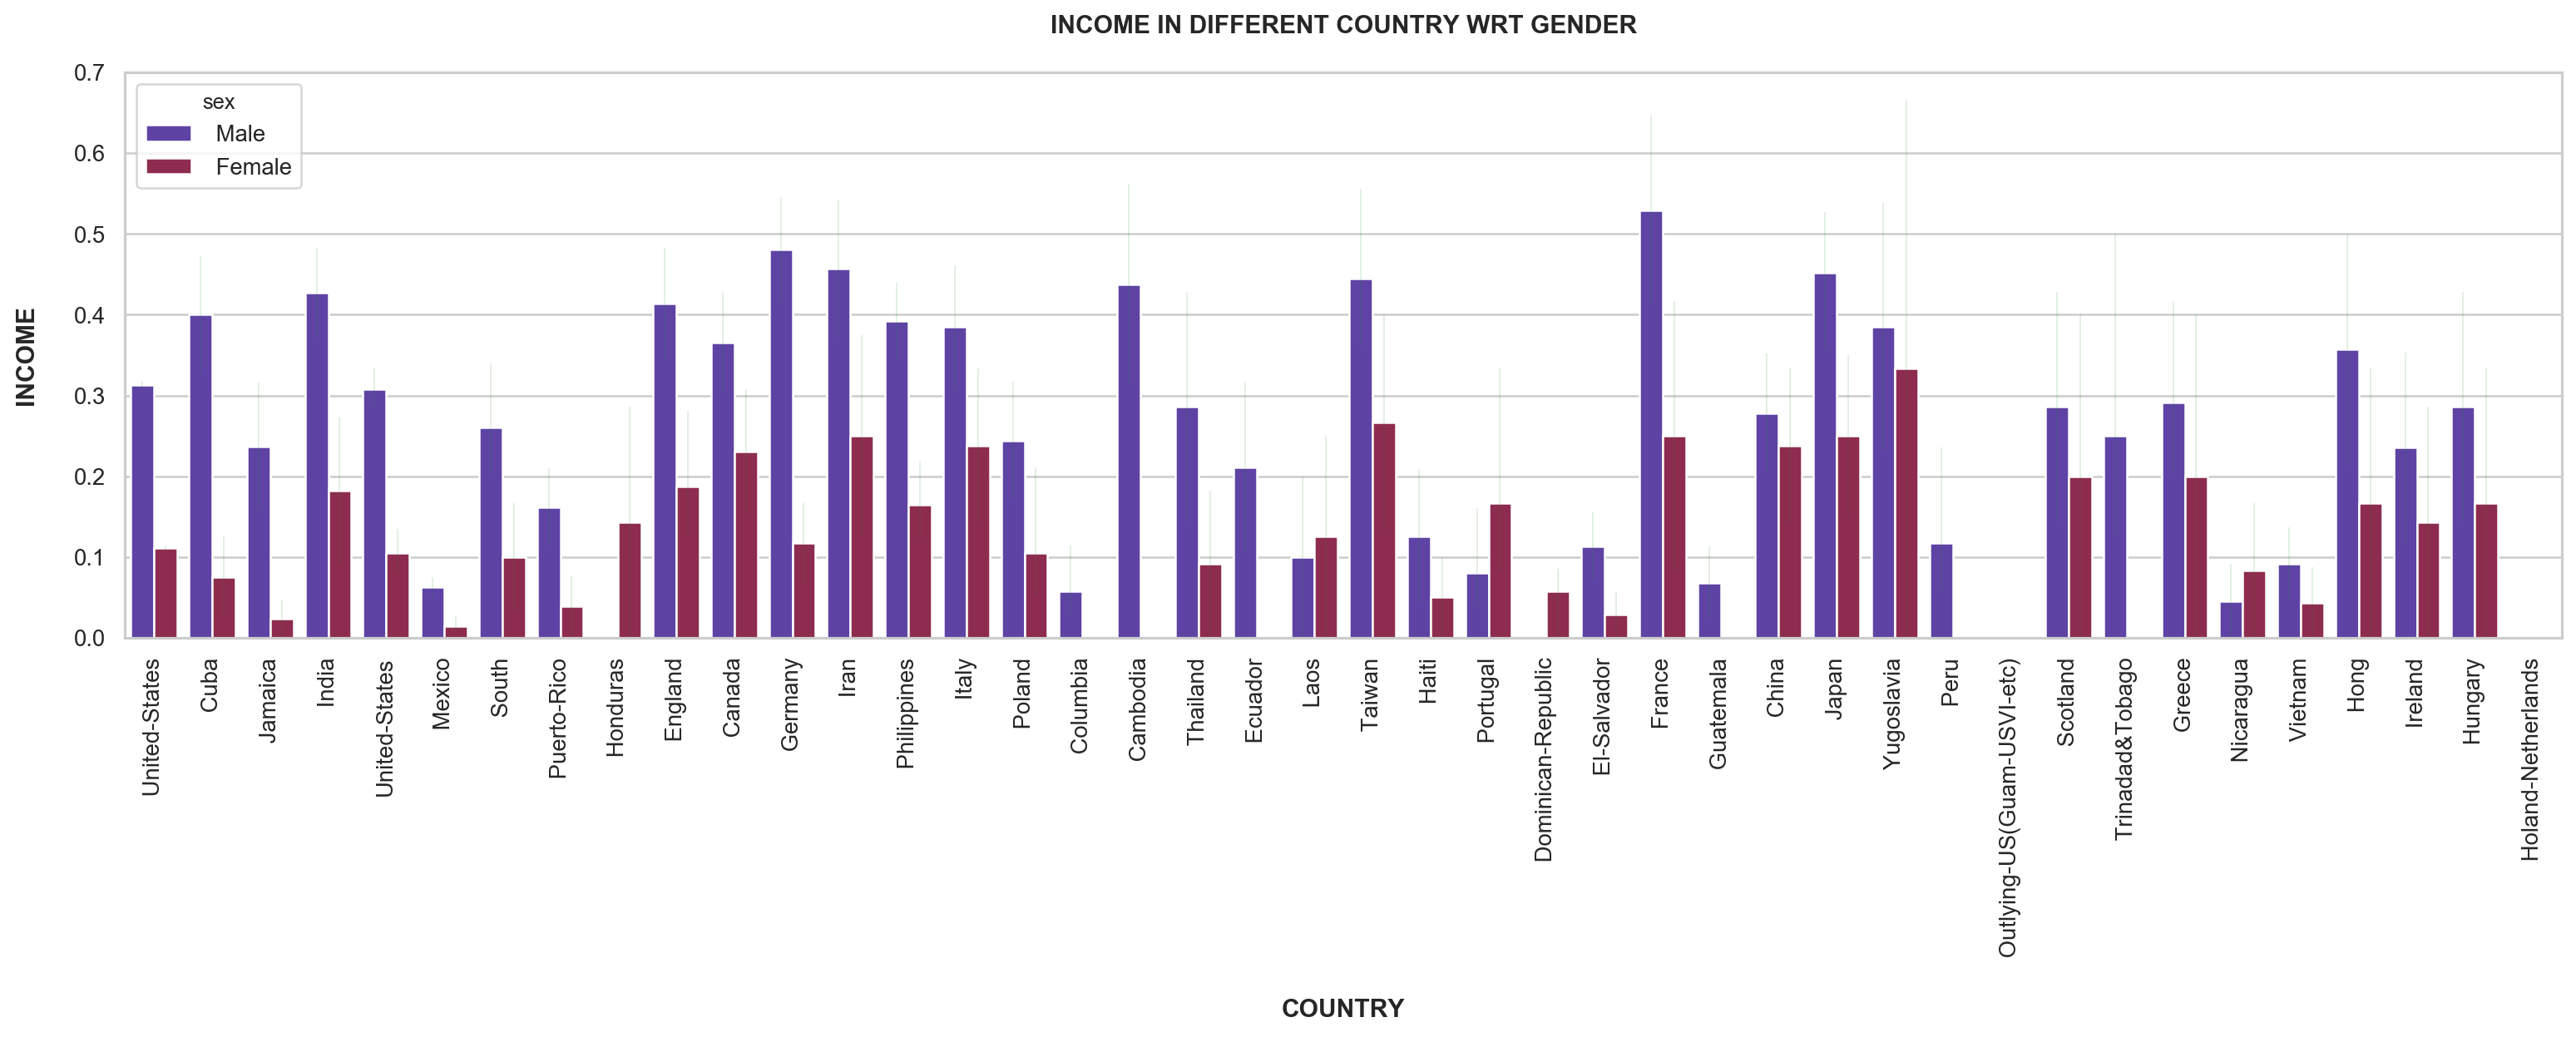

In [46]:
plt.figure(figsize=(21,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
m2=sns.barplot(x='country',y='income',hue='sex',data=cen,ci=75,orient='v',palette='twilight',saturation=25,errcolor='forestgreen',errwidth=0.1)
m2.set_xticklabels(m2.get_xticklabels(),rotation=90)
plt.xlabel('\nCOUNTRY',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.title('INCOME IN DIFFERENT COUNTRY WRT GENDER\n',weight='bold')
plt.show()

                    MALE POPLUATION BELONGS TO THE HIGH EARNING GROUP IN EVERY COUNTYRY

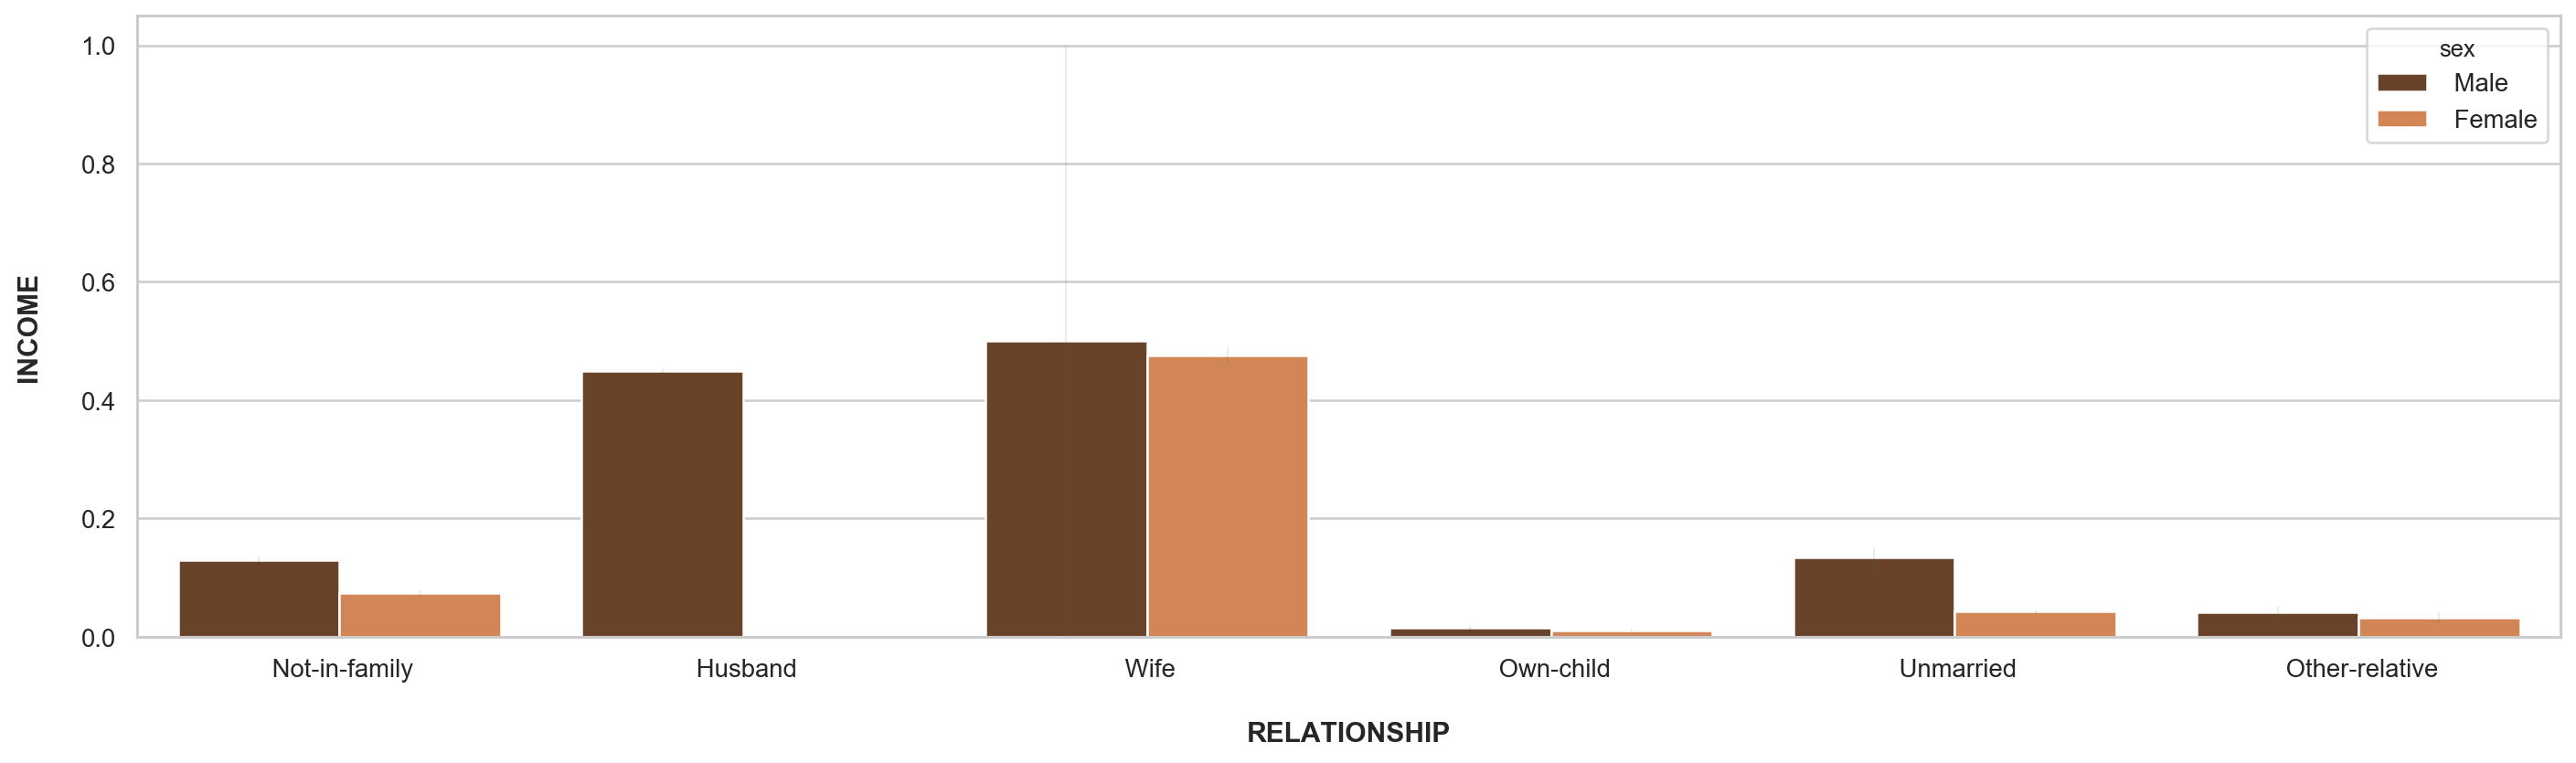

In [47]:
plt.figure(figsize=(19,5),dpi=180)
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
sns.barplot(x='relationship',y='income',hue='sex',data=cen,ci=75,orient='v',palette='copper',saturation=25,errcolor='forestgreen',errwidth=0.1)
plt.xlabel('\nRELATIONSHIP',weight='bold')
plt.ylabel('INCOME\n ',weight='bold')
plt.show()

In [48]:
cen.drop(['fnlwgt','edu'],axis=1,inplace=True)
cen.head(4)

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [49]:
lbl=LabelEncoder()
for i in ('workclass','status','occu','relationship','race','sex','country'):
    cen[i]=lbl.fit_transform(cen[i])
cen.head(7)    

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
5,37,3,14,2,3,5,4,0,0,0,40,38,0
6,49,3,5,3,7,1,2,0,0,0,16,22,0


<Figure size 1440x360 with 0 Axes>

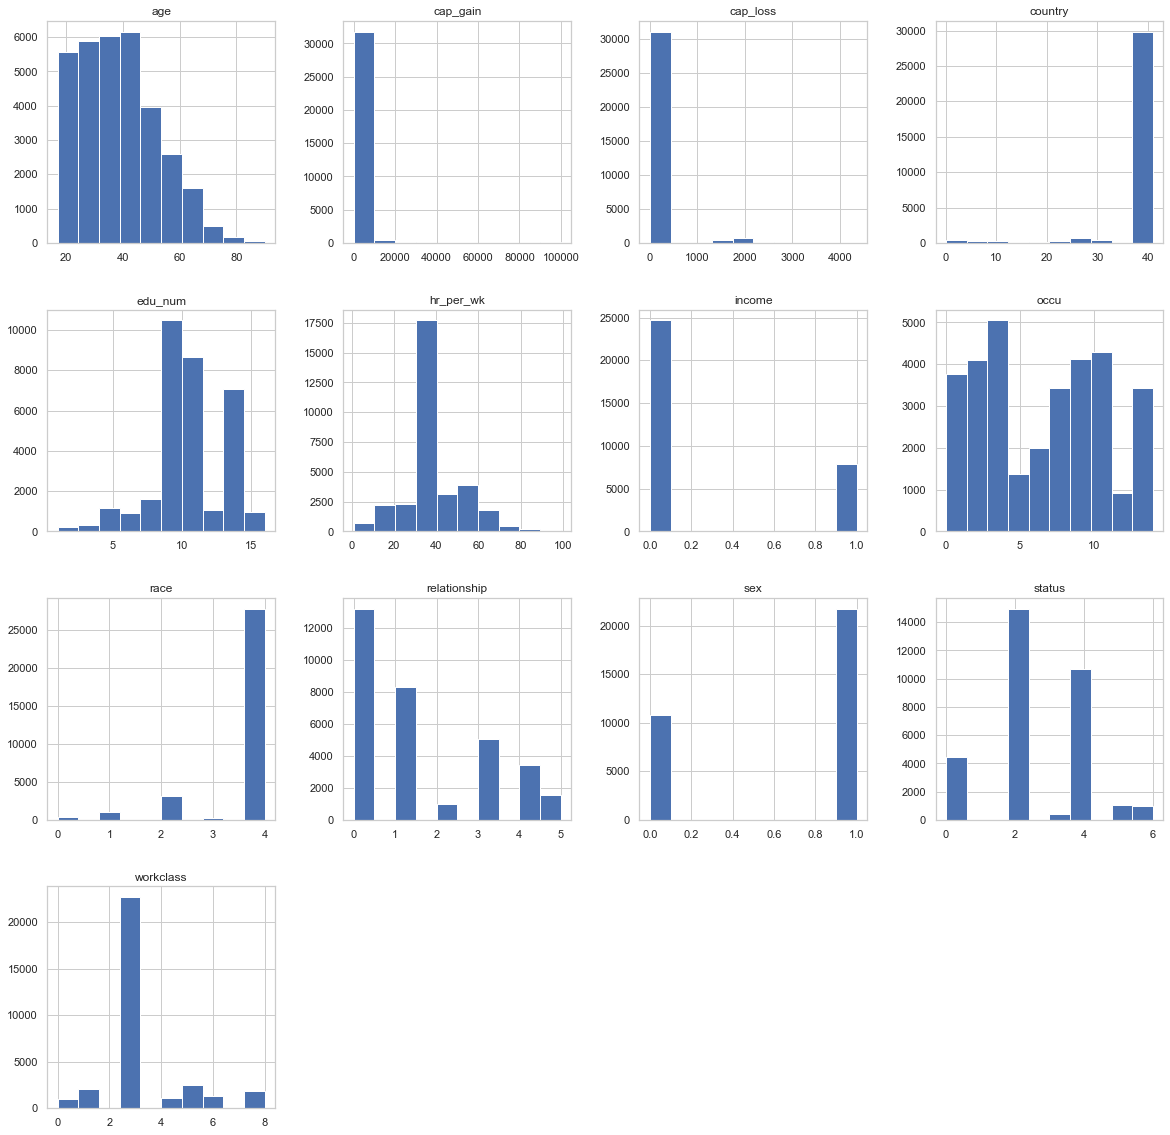

In [50]:
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
plt.figure(figsize=(12,3),dpi=120)
cen.hist(figsize=(20,20),grid=True)
plt.show()

In [51]:
#plotting boxlot and using zscore to remove outliers
cl=cen.columns.values
cl

array(['age', 'workclass', 'edu_num', 'status', 'occu', 'relationship',
       'race', 'sex', 'cap_gain', 'cap_loss', 'hr_per_wk', 'country',
       'income'], dtype=object)

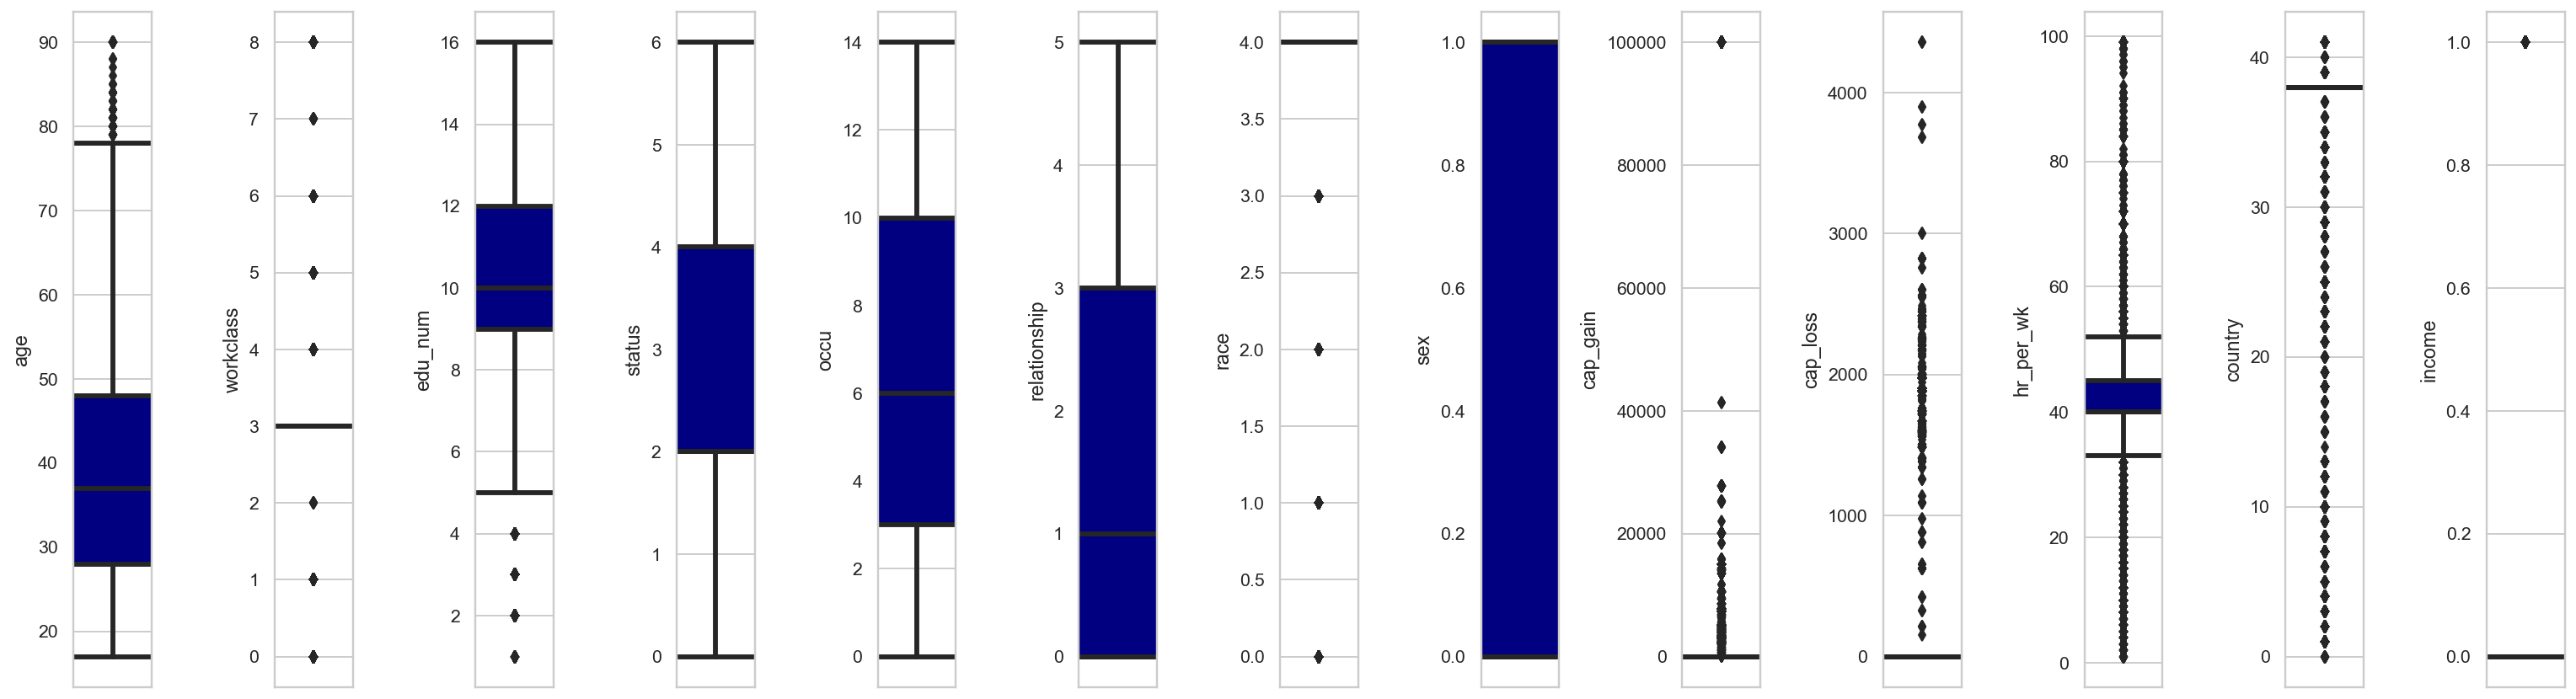

In [52]:
plt.figure(figsize=(22,12),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,13):
    plt.subplot(2,13,i+1)
    sns.boxplot(cen[cl[i]],orient='v',color='navy',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [53]:
z=np.abs(zscore(cen))
z

array([[0.03038995, 1.65772373, 1.13477712, ..., 0.03566374, 0.25114627,
        0.56337742],
       [0.8369732 , 1.02582799, 1.13477712, ..., 2.22248299, 0.25114627,
        0.56337742],
       [0.0429358 , 0.23796351, 0.42067868, ..., 0.03566374, 0.25114627,
        0.56337742],
       ...,
       [1.42357919, 0.23796351, 0.42067868, ..., 0.03566374, 0.25114627,
        0.56337742],
       [1.2161478 , 0.23796351, 0.42067868, ..., 1.65552985, 0.25114627,
        0.56337742],
       [0.9836247 , 0.39393224, 0.42067868, ..., 0.03566374, 0.25114627,
        1.77500901]])

In [54]:
print(np.where(z>3))

(array([    4,    10,    11, ..., 32509, 32527, 32529], dtype=int64), array([11, 10,  6, ...,  6,  6,  6], dtype=int64))


In [55]:
print(z[4][11],'\n',z[32509][6])

5.340283794831575 
 3.1405746679078033


In [56]:
census=cen[(z<3).all(axis=1)]
census

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
5,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,9,4,0,3,4,1,0,0,20,38,0


In [57]:
print('The shape before outlier removal:\t',cen.shape,'\nThe shape after outlier removal:\t',census.shape,
      '\nSo a total of',len(cen)-len(census),'rows has been removed')

The shape before outlier removal:	 (32537, 13) 
The shape after outlier removal:	 (28075, 13) 
So a total of 4462 rows has been removed


In [58]:
cl=census.columns.values
cl

array(['age', 'workclass', 'edu_num', 'status', 'occu', 'relationship',
       'race', 'sex', 'cap_gain', 'cap_loss', 'hr_per_wk', 'country',
       'income'], dtype=object)

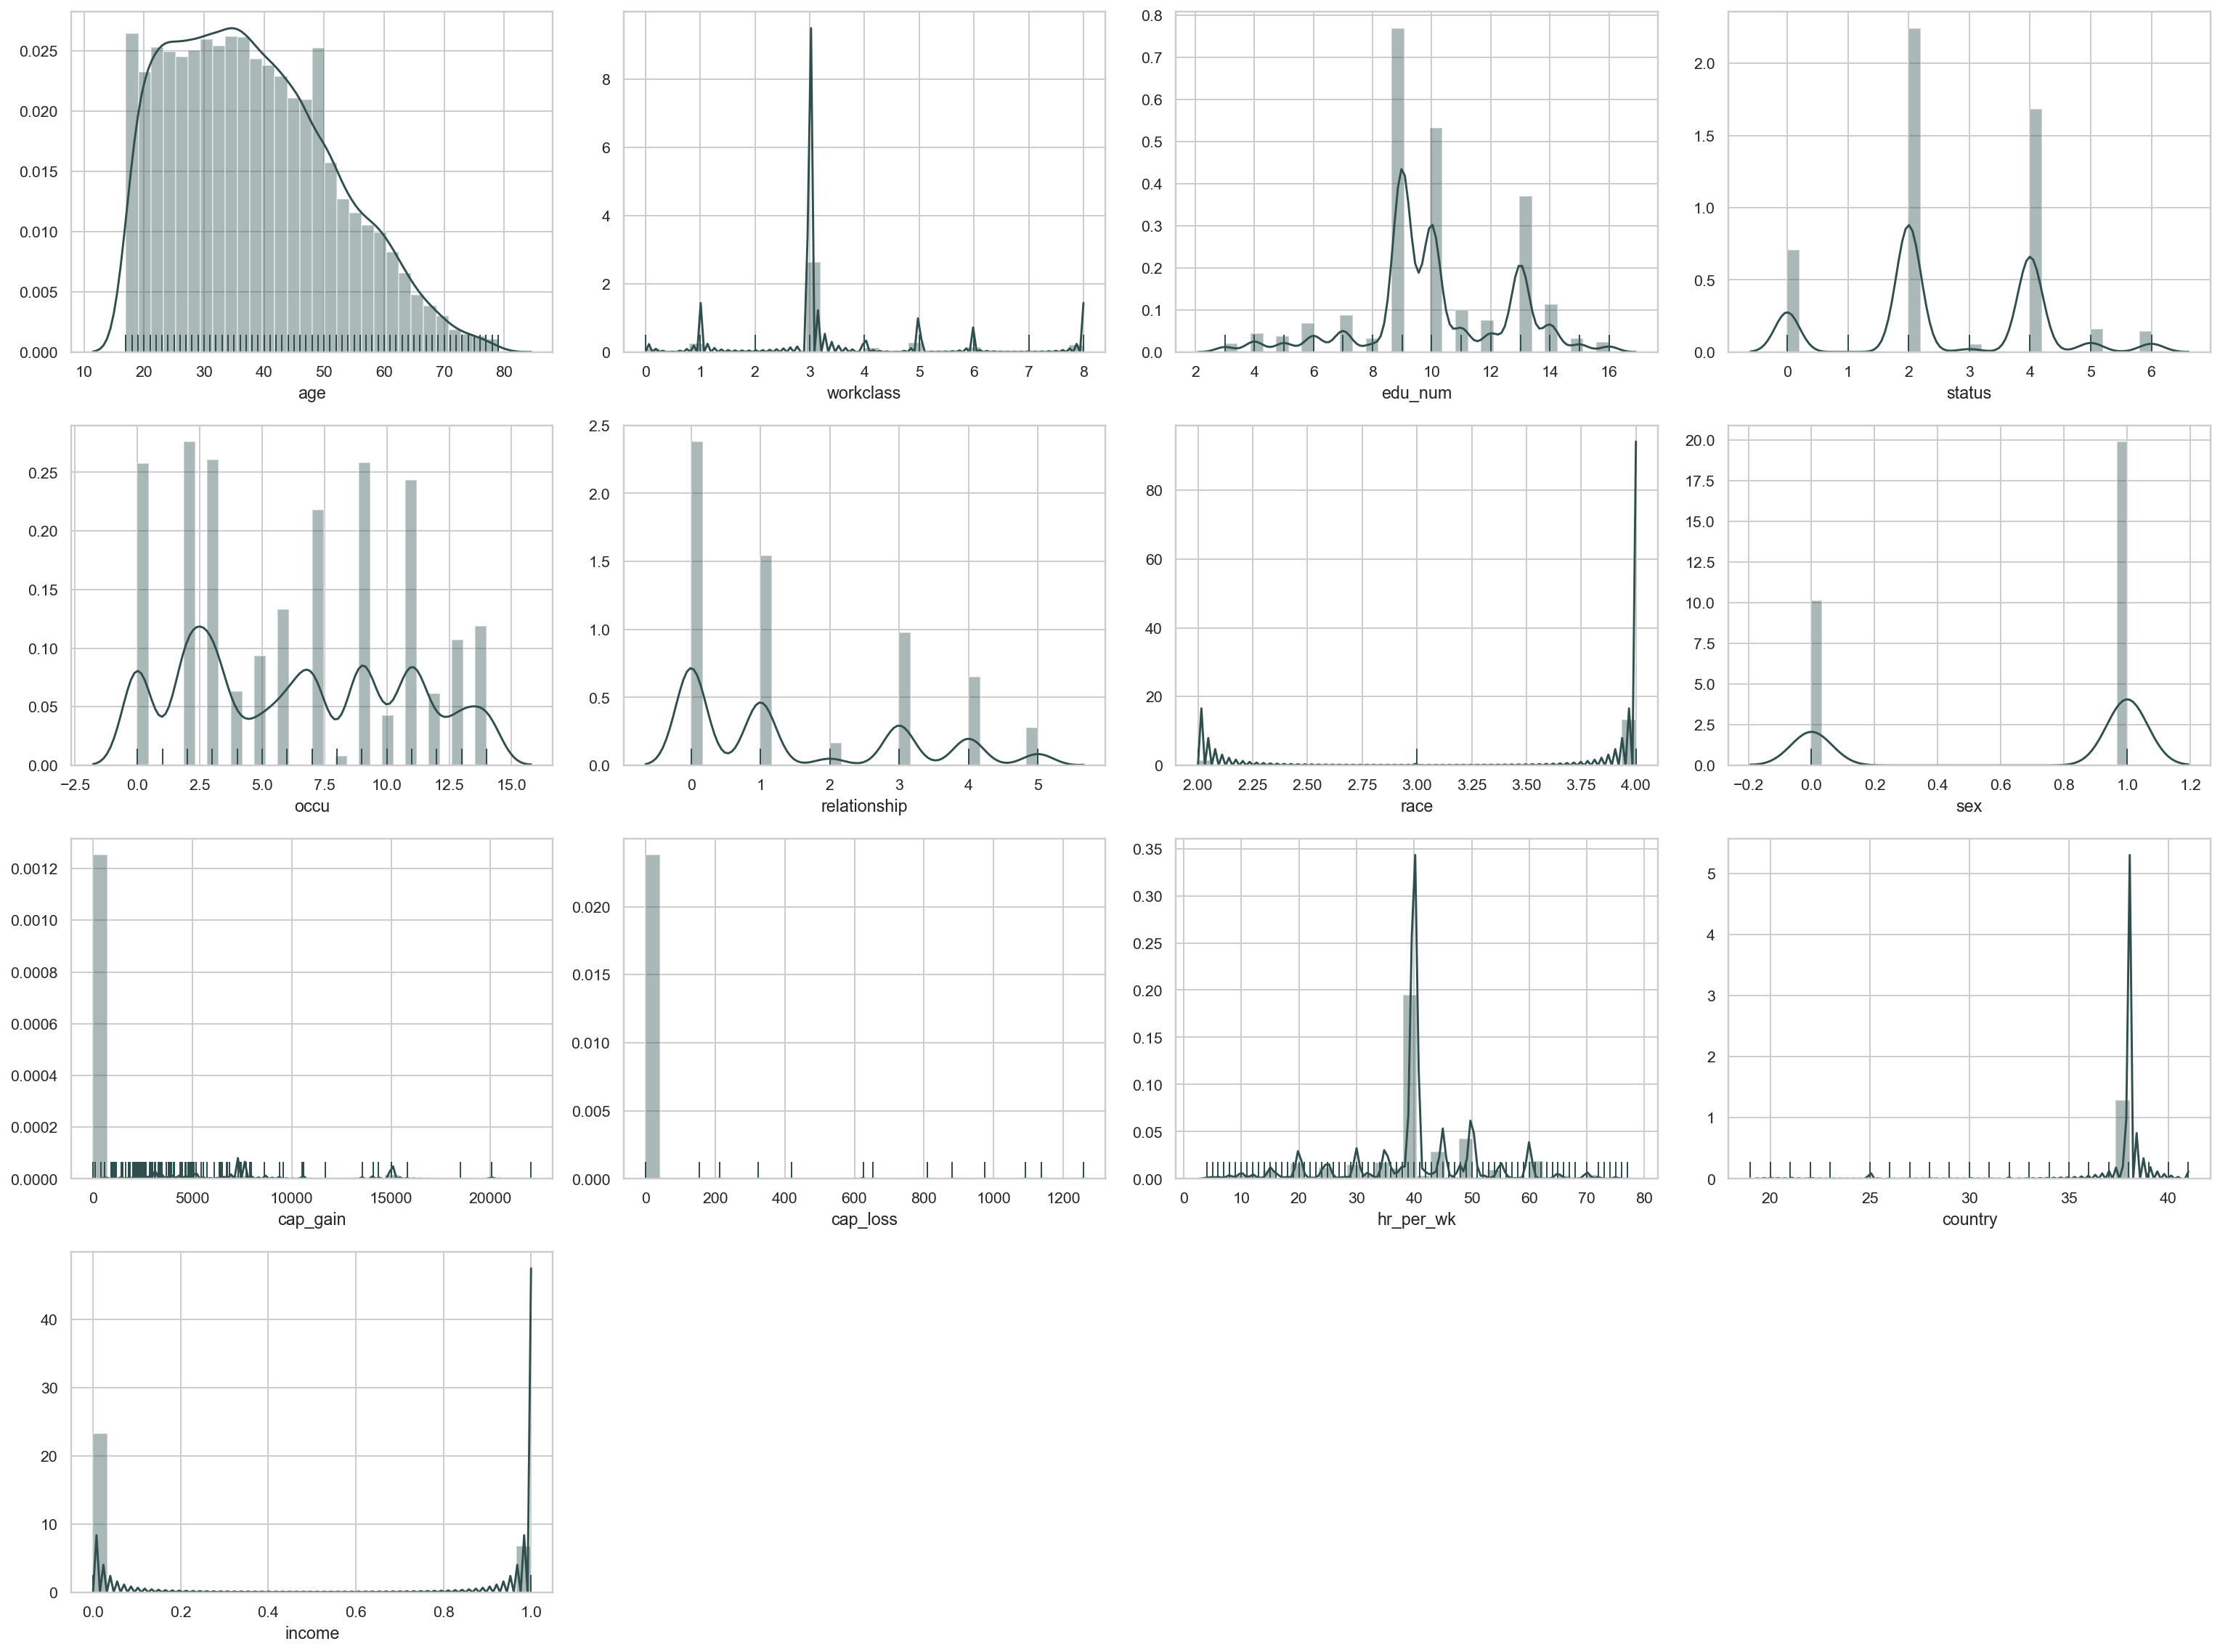

In [59]:
#using distplot to view distribution of all attributes
plt.figure(figsize=(22,20),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,13):
    plt.subplot(5,4,i+1)
    sns.distplot(census[cl[i]],color='darkslategrey',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [60]:
census.skew()
#checking skewness and removing them

age              0.487920
workclass        1.184046
edu_num         -0.147625
status          -0.046545
occu             0.136741
relationship     0.751712
race            -2.549498
sex             -0.689929
cap_gain         4.924920
cap_loss        29.676716
hr_per_wk       -0.359258
country         -5.126370
income           1.322782
dtype: float64

In [61]:
for i in census.columns:
    if census.skew().loc[i]>0.55:
        census[i]=np.log1p(census[i])

In [62]:
cen_corr=census.corr()
cen_corr

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
age,1.000000,-0.000785,0.045444,-0.286220,0.005576,-0.323222,0.021524,0.089017,0.126285,0.022321,0.090661,0.036986,0.241523
workclass,-0.000785,1.000000,-0.081619,0.043522,0.228090,0.007078,0.054916,0.017521,-0.014789,-0.011192,-0.070733,-0.006681,-0.068993
edu_num,0.045444,-0.081619,1.000000,-0.058768,0.045640,-0.097280,0.080738,0.003842,0.116895,0.006734,0.156246,0.151446,0.320270
status,-0.286220,0.043522,-0.058768,1.000000,0.053899,0.255625,-0.084582,-0.125294,-0.067661,-0.017877,-0.195969,-0.029925,-0.194177
occu,0.005576,0.228090,0.045640,0.053899,1.000000,-0.011894,-0.004573,0.030376,0.001838,-0.002306,-0.064456,0.019052,0.008371
relationship,-0.323222,0.007078,-0.097280,0.255625,-0.011894,1.000000,-0.150960,-0.598574,-0.106499,0.033523,-0.284680,-0.011230,-0.321153
race,0.021524,0.054916,0.080738,-0.084582,-0.004573,-0.150960,1.000000,0.122586,0.032523,-0.001668,0.055363,0.011763,0.094701
sex,0.089017,0.017521,0.003842,-0.125294,0.030376,-0.598574,0.122586,1.000000,0.066468,-0.032774,0.236172,-0.008941,0.211734
cap_gain,0.126285,-0.014789,0.116895,-0.067661,0.001838,-0.106499,0.032523,0.066468,1.000000,-0.011828,0.080554,0.021559,0.284636
cap_loss,0.022321,-0.011192,0.006734,-0.017877,-0.002306,0.033523,-0.001668,-0.032774,-0.011828,1.000000,-0.003330,0.000303,-0.017228


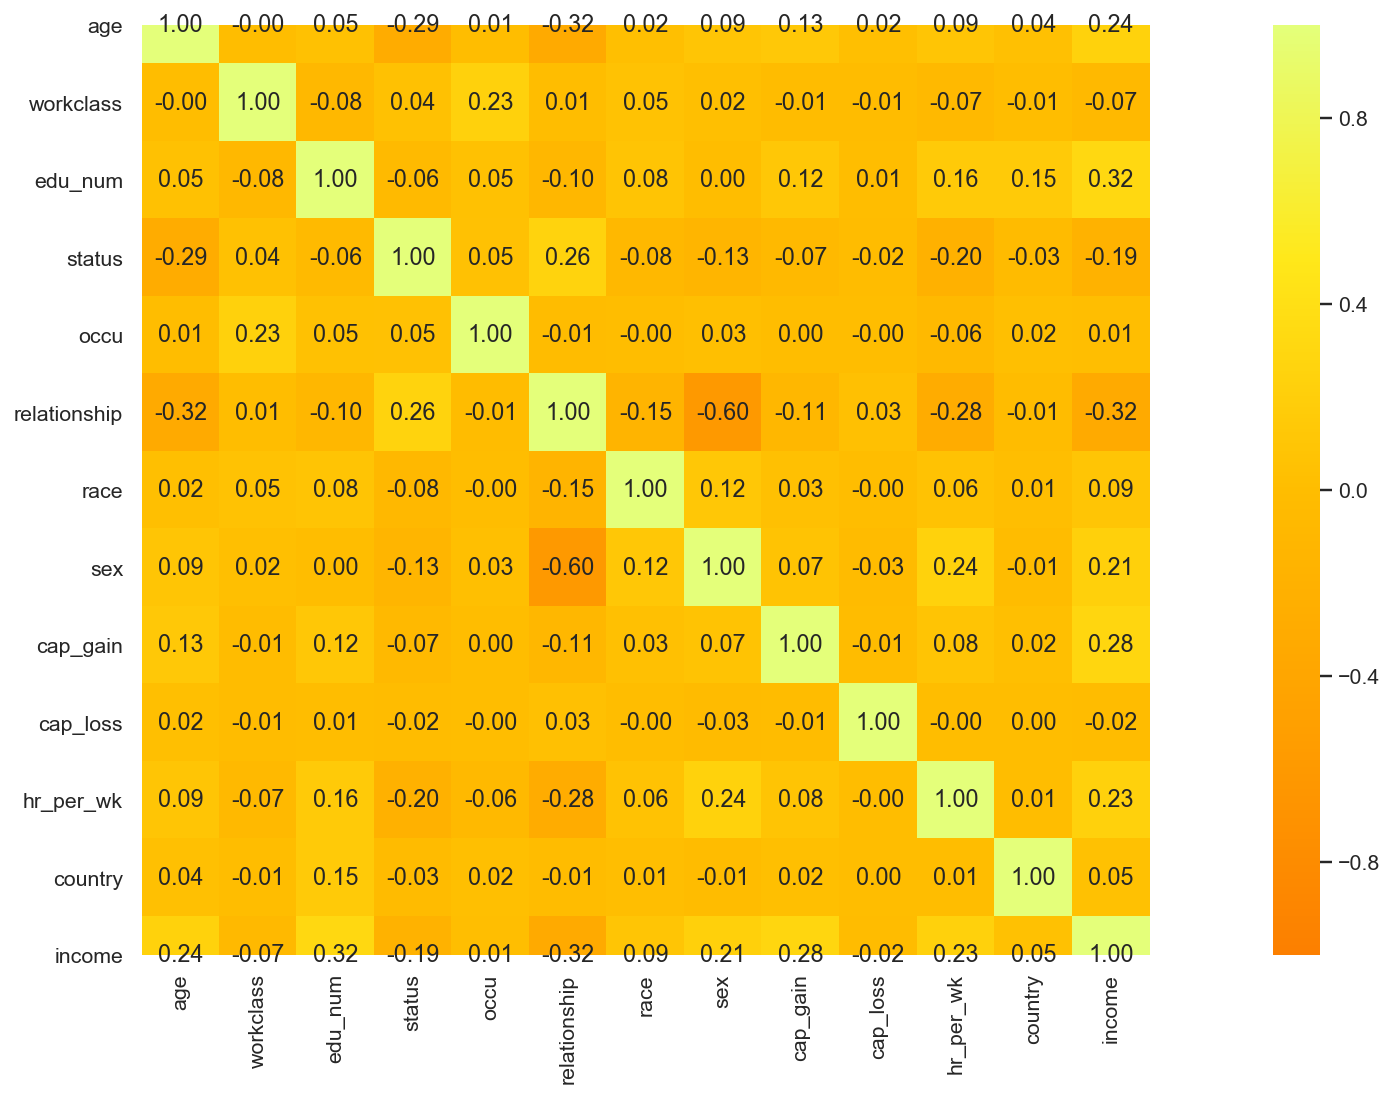

In [63]:
plt.figure(figsize=(18,8),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
sns.heatmap(cen_corr,annot=True,fmt='.2f',cmap='Wistia_r',square=True,vmax=1,vmin=-1)
plt.tight_layout()
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [65]:
cen.head(10)

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0
5,37,3,14,2,3,5,4,0,0,0,40,38,0
6,49,3,5,3,7,1,2,0,0,0,16,22,0
7,52,5,9,2,3,0,4,1,0,0,45,38,1
8,31,3,14,4,9,1,4,0,14084,0,50,38,1
9,42,3,13,2,3,0,4,1,5178,0,40,38,1


In [66]:
census.head(7)

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,1.945910,13,4,0,0.693147,4,1,7.684784,0.0,40,38,0.000000
1,50,1.791759,13,2,3,0.000000,4,1,0.000000,0.0,13,38,0.000000
2,38,1.386294,9,0,5,0.693147,4,1,0.000000,0.0,40,38,0.000000
3,53,1.386294,7,2,5,0.000000,2,1,0.000000,0.0,40,38,0.000000
5,37,1.386294,14,2,3,1.791759,4,0,0.000000,0.0,40,38,0.000000
6,49,1.386294,5,3,7,0.693147,2,0,0.000000,0.0,16,22,0.000000
7,52,1.791759,9,2,3,0.000000,4,1,0.000000,0.0,45,38,0.693147


In [67]:
census['income']=census['income'].round()

In [68]:
census['income']=census['income'].astype('int64')

In [69]:
census.head(14)

,age,workclass,edu_num,status,occu,relationship,race,sex,cap_gain,cap_loss,hr_per_wk,country,income
0,39,1.945910,13,4,0,0.693147,4,1,7.684784,0.0,40,38,0
1,50,1.791759,13,2,3,0.000000,4,1,0.000000,0.0,13,38,0
2,38,1.386294,9,0,5,0.693147,4,1,0.000000,0.0,40,38,0
3,53,1.386294,7,2,5,0.000000,2,1,0.000000,0.0,40,38,0
5,37,1.386294,14,2,3,1.791759,4,0,0.000000,0.0,40,38,0
6,49,1.386294,5,3,7,0.693147,2,0,0.000000,0.0,16,22,0
7,52,1.791759,9,2,3,0.000000,4,1,0.000000,0.0,45,38,1
8,31,1.386294,14,4,9,0.693147,4,0,9.552866,0.0,50,38,1
9,42,1.386294,13,2,3,0.000000,4,1,8.552367,0.0,40,38,1
12,23,1.386294,13,4,0,1.386294,4,0,0.000000,0.0,30,38,0


In [70]:
#splitting the dataset into X and Y for training and testing
x=cen.drop(['income'],axis=1)
y=cen['income']
print('x:',"--"*30,"\n", x,'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y,'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
        age  workclass  edu_num  status  occu  relationship  race  sex  \
0       39          6       13       4     0             1     4    1   
1       50          5       13       2     3             0     4    1   
2       38          3        9       0     5             1     4    1   
3       53          3        7       2     5             0     2    1   
4       28          3       13       2     9             5     2    0   
...    ...        ...      ...     ...   ...           ...   ...  ...   
32556   27          3       12       2    12             5     4    0   
32557   40          3        9       2     6             0     4    1   
32558   58          3        9       6     0             4     4    0   
32559   22          3        9       4     0             3     4    1   
32560   52          4        9       2     3             5     4    0   

       cap_gain  cap_loss  hr_per_wk  country  
0        

In [71]:
#Using StandardScaler Feature to standardise the values of x
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[ 0.03038995  1.65772373  1.13477712 ... -0.21674317 -0.03566374
   0.25114627]
 [ 0.8369732   1.02582799  1.13477712 ... -0.21674317 -2.22248299
   0.25114627]
 [-0.0429358  -0.23796351 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]
 ...
 [ 1.42357919 -0.23796351 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]
 [-1.2161478  -0.23796351 -0.42067868 ... -0.21674317 -1.65552985
   0.25114627]
 [ 0.9836247   0.39393224 -0.42067868 ... -0.21674317 -0.03566374
   0.25114627]]


In [72]:
#converting y into  np.array format form pandas.core.series.Series form and reshaping it in the form of 1 columns and many rows
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(32537, 1)


In [73]:
print('shape of x=', x.shape,'\nshape of y=', y.shape)

shape of x= (32537, 12) 
shape of y= (32537, 1)


In [74]:
pca=PCA(n_components=10)
pca.fit(x)
xp=pca.transform(x)
print(pca.explained_variance_ratio_)
print('\n',pca.explained_variance_ratio_.sum())

[0.17034376 0.11261075 0.09703083 0.09126989 0.08799899 0.08534153
 0.0739126  0.07174637 0.06569217 0.05742331]

 0.9133701913804404


In [75]:
print('shape of x befor decomposition=', x.shape,'\nshape of x after decomposistion=', xp.shape)

shape of x befor decomposition= (32537, 12) 
shape of x after decomposistion= (32537, 10)


In [76]:
def acusr(model,xp,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(xp,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    

LOGISTIC REGRESSION

In [77]:
logi=LogisticRegression()
acusr(logi,xp,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  108 

Accuracy score: 0.8321039690902705

F1 SCORE: 0.5650737722968511

CONFUSION MATRIX:
 [[8130  506]
 [1469 1283]]

AUC_ROC Score:
 0.703807227317772

TPR: [0.         0.05859194 1.        ] 
FPR: [0.        0.4662064 1.       ]


In [78]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,xp,y,scoring='accuracy',cv=50)
logi_roc_auc=cvs(logi,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.8257371284083149
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.8533912980718944


DECISION TREE CLASSIFIER

In [79]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=70)
dtc_rs.fit(xp,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [80]:
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=3,max_depth=9,criterion='entropy')
acusr(dtc,xp,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

The best suited random_score is:  161 

Accuracy score: 0.8399192132068845

F1 SCORE: 0.6012040689225658

CONFUSION MATRIX:
 [[8019  617]
 [1304 1448]]

AUC_ROC Score:
 0.727358838609606

TPR: [0.         0.07144511 1.        ] 
FPR: [0.         0.52616279 1.        ]


In [81]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,xp,y,scoring='accuracy',cv=50)
dtc_roc_auc=cvs(dtc,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.8356024732693951
THE AUC_ROC SCORE AT DTC MODEL IS= 0.8681811368920365


SUPPORT VECTOR CLASSIFIER

In [82]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=70)
svc_rsv.fit(xp,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8490641423610044

best parameters for SVC=
 {'kernel': 'rbf', 'gamma': 0.1}


In [84]:
svc=SVC(kernel='rbf',gamma=0.1,degree=5)
acusr(svc,xp,y)

In this SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  41 

Accuracy score: 0.8551106427818757

F1 SCORE: 0.6281884997838305

CONFUSION MATRIX:
 [[8215  421]
 [1299 1453]]

AUC_ROC Score:
 0.7396151150672684

TPR: [0.         0.04874942 1.        ] 
FPR: [0.         0.52797965 1.        ]


In [85]:
#using cross_val_score to check for over/under fitting of SVC model
svc_accuracy=cvs(svc,xp,y,scoring='accuracy',cv=50)
svc_roc_auc=cvs(svc,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 0.8493407706927663
THE AUC_ROC SCORE AT SVC MODEL IS= 0.8891609097203366


K_NEIGHBORS CLASSIFIERS

In [86]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute']}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(xp,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8446076774134063

best parameters for KNC=
 {'n_neighbors': 27, 'algorithm': 'brute'}


In [87]:
knc=KNeighborsClassifier(n_neighbors=27,algorithm='brute',leaf_size=40)
acusr(knc,xp,y)

In this KNeighborsClassifier(algorithm='brute', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform') 

The best suited random_score is:  41 

Accuracy score: 0.8495785036880927

F1 SCORE: 0.6426294820717132

CONFUSION MATRIX:
 [[7981  655]
 [1139 1613]]

AUC_ROC Score:
 0.7551369436485452

TPR: [0.        0.0758453 1.       ] 
FPR: [0.         0.58611919 1.        ]


In [88]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,xp,y,scoring='accuracy',cv=50)
knc_roc_auc=cvs(knc,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.8449481452755373
THE AUC_ROC SCORE AT KNC MODEL IS= 0.8935716601744589


GAUSSIAN NB

In [89]:
gnb=GaussianNB()
acusr(gnb,xp,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  175 

Accuracy score: 0.7793291183702142

F1 SCORE: 0.33341727524553005

CONFUSION MATRIX:
 [[8079  557]
 [2090  662]]

AUC_ROC Score:
 0.5880274365285393

TPR: [0.         0.06449745 1.        ] 
FPR: [0.         0.24055233 1.        ]


In [90]:
#using cross_val_score to check for over/under fitting of KNC model
gnb_accuracy=cvs(gnb,xp,y,scoring='accuracy',cv=50)
gnb_roc_auc=cvs(gnb,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.7682037150019654
THE AUC_ROC SCORE AT GNB MODEL IS= 0.7910941020739092


RANDOM FOREST CLASSIFIER

In [91]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[400,600],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=70)
rfc_rsv.fit(xp,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [92]:
rfc=RandomForestClassifier(n_estimators=600,max_depth=9,criterion='entropy')
acusr(rfc,xp,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  157 

Accuracy score: 0.8517737969792765

F1 SCORE: 0.6313065976714102

CONFUSION MATRIX:
 [[8214  422]
 [1288 1464]]

AUC_ROC Score:
 0.7415557644042785

TPR: [0.         0.04886522 1.        ] 
FPR: [0.         0.53197674 1.        ]


In [93]:
rfc_accuracy=cvs(rfc,xp,y,scoring='accuracy',cv=50)
rfc_roc_auc=cvs(rfc,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.8463288356622418
THE AUC_ROC SCORE AT RFC MODEL IS= 0.8971361307081023


GRADIENT BOOSTING CLASSIFIER

In [94]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(xp,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.001,0.025],"n_estimators":[450,600]}
gbc_rs= rsv(gbc,para,cv=70)
gbc_rs.fit(x_train,y_train)
print(gbc_rs)
print("\nbest parameters:",gbc_rs.best_params_)
print("\n best score:",gbc_rs.best_score_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [95]:
gbc=GradientBoostingClassifier(learning_rate=0.025,max_depth=9,n_estimators=600)
acusr(gbc,xp,y)

In this GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

The best suited random_score is:  41 

Accuracy score: 0.8514225500526871

F1 SCORE: 0.6561327276318388

CONFUSION MATRIX:
 [[7986  650]
 [1091 1661]]

AUC_ROC Score:
 0.7641473597541929

TPR: [0.         0.07526633 1.        ] 
FPR: [0.         0.60356105 1.        ]


In [96]:
gbc_accuracy=cvs(gbc,xp,y,scoring='accuracy',cv=50)
gbc_roc_auc=cvs(gbc,xp,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GBC MODEL IS=', gbc_accuracy.mean())
print('THE AUC_ROC SCORE AT GBC MODEL IS=',  gbc_roc_auc.mean())

THE ACCURACY SCORE AT GBC MODEL IS= 0.8474050519555167
THE AUC_ROC SCORE AT GBC MODEL IS= 0.8998817068128592


WE GOT ALL THE RANDOM STATE,ACCURACY_SCORE,AUC_ROC SCORE OF ALL ALGORITHMS WITH AND WITHOUT CROSSVALIDATION
NOW PUTTING THEM ALL IN ONE DATAFRAME FOR TABULAR FORM PROPER VISUALIZATION

In [98]:
results=[['LOGI_REG',108,0.83210,0.70380,[0.0,0.05859194,1.0],[0.0,0.4662064,1.0],0.82573,0.853391],

         ['DTC',161,0.83991,0.72735,[0.0,0.07144511,1.0],[0.0,0.07144511,1.0],0.835607,0.868181],
         
         ['SVC',41,0.855110,0.739615,[0.0,0.04874942,1.0],[0.0,0.52797965,1.0],0.849340,0.889160],
         
         ['KNC',41,0.849578,0.755136,[0.0,0.0758453,1.0],[0.0,0.58611919,1.0],0.844948, 0.893571],
         
         ['GNB',175,0.779329,0.588027,[0.0,0.06449745,1.0],[0.0,0.24055233,1.0],0.768203,0.791094],
         
         ['RFC',157,0.851773,0.741555,[0.0,0.04886522,1.0],[0.0,0.53197674,1.0],0.8463288,0.897136],
         
         ['GBC',41,0.851422,0.764147,[0.0,0.07526633,1.0],[0.0,0.60356105,1.0],0.8474050,0.8998817]]
df=pd.DataFrame(results,columns=['MODEL','RST','ACCU W\O CV','AUC SCORE W/O CV','TPR','FPR','ACCURACY W CV','AUC SCORE W CV'])
df.style.set_properties(**{'background-color': 'black','color': 'yellow','border-color': 'cyan'})

,MODEL,RST,ACCU W\O CV,AUC SCORE W/O CV,TPR,FPR,ACCURACY W CV,AUC SCORE W CV
0,LOGI_REG,108,0.8321,0.7038,"[0.0, 0.05859194, 1.0]","[0.0, 0.4662064, 1.0]",0.82573,0.853391
1,DTC,161,0.83991,0.72735,"[0.0, 0.07144511, 1.0]","[0.0, 0.07144511, 1.0]",0.835607,0.868181
2,SVC,41,0.85511,0.739615,"[0.0, 0.04874942, 1.0]","[0.0, 0.52797965, 1.0]",0.84934,0.88916
3,KNC,41,0.849578,0.755136,"[0.0, 0.0758453, 1.0]","[0.0, 0.58611919, 1.0]",0.844948,0.893571
4,GNB,175,0.779329,0.588027,"[0.0, 0.06449745, 1.0]","[0.0, 0.24055233, 1.0]",0.768203,0.791094
5,RFC,157,0.851773,0.741555,"[0.0, 0.04886522, 1.0]","[0.0, 0.53197674, 1.0]",0.846329,0.897136
6,GBC,41,0.851422,0.764147,"[0.0, 0.07526633, 1.0]","[0.0, 0.60356105, 1.0]",0.847405,0.899882


Basing on the above tabulation GBC is performing well so taking it for fim=nal model building

In [103]:
df.loc[df['MODEL']=='GBC']

,MODEL,RST,ACCU W\O CV,AUC SCORE W/O CV,TPR,FPR,ACCURACY W CV,AUC SCORE W CV
6,GBC,41,0.851422,0.764147,"[0.0, 0.07526633, 1.0]","[0.0, 0.60356105, 1.0]",0.847405,0.899882


In [107]:
tpr=[0.0, 0.07526633, 1.0]

fpr=[0.0, 0.60356105, 1.0]

auc=0.899882

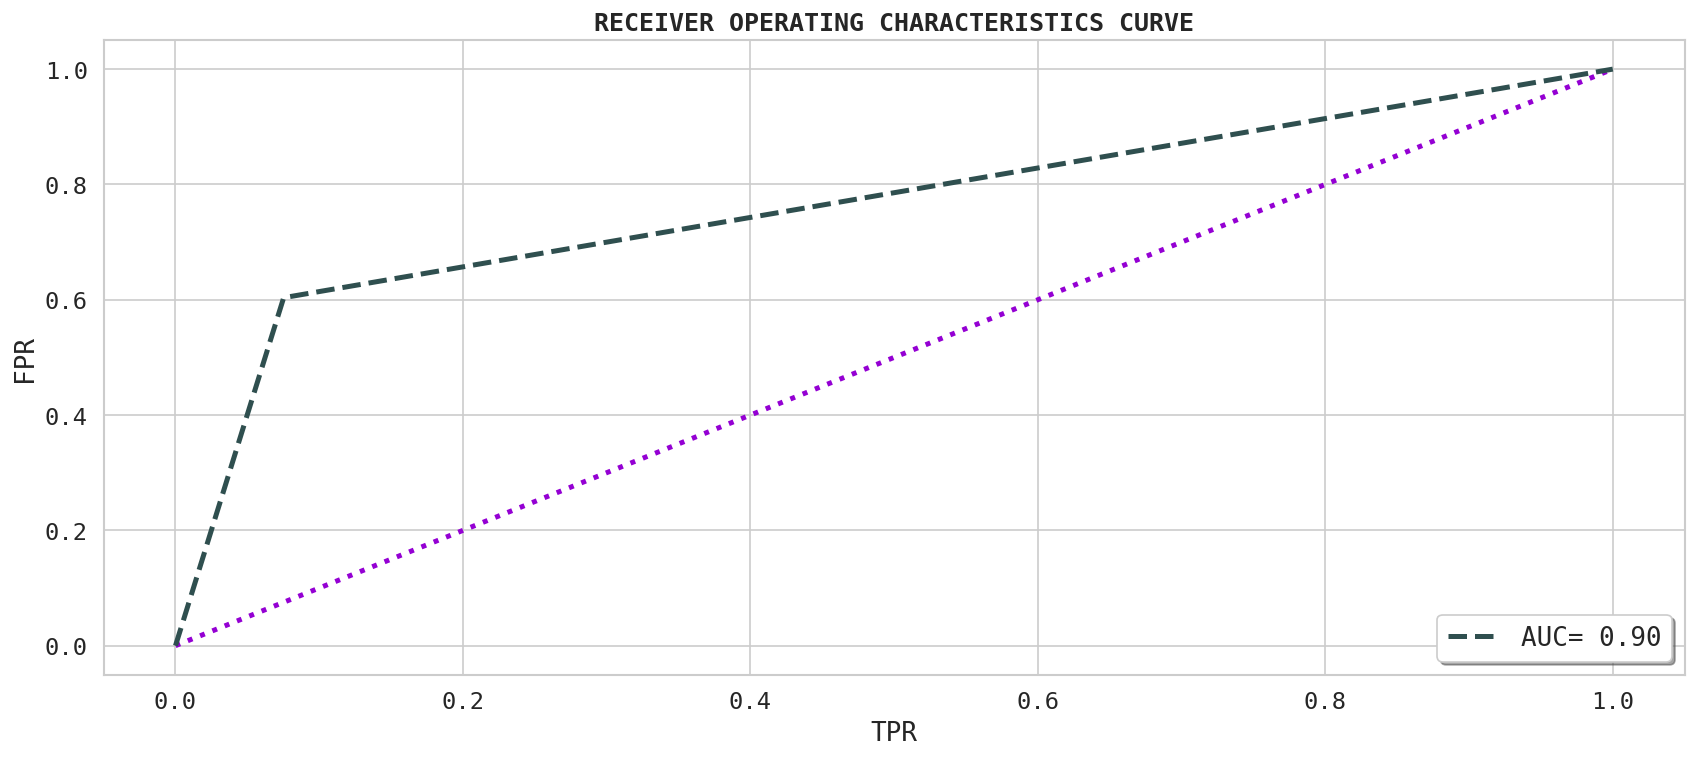

In [108]:
#plotting the auc_roc courve
plt.figure(figsize=(17,7),dpi=120)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.plot([0,1],[0,1],color='darkviolet',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc,color='darkslategrey',lw=3,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='center')
plt.show()


In [109]:
#saving the model
import joblib
joblib.dump(gbc,'CENSUS_GBC.pkl')

['CENSUS_GBC.pkl']